In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Ignore warnings (optional)
import warnings
warnings.filterwarnings('ignore')
# Load the datasets
low_pop_data = pd.read_csv(r'F:\Major Project\low_popularity_spotify_data.csv')
high_pop_data = pd.read_csv(r'F:\Major Project\high_popularity_spotify_data (1).csv')

In [4]:
# Assigning popularity types to each dataset
low_pop_data['Popularity_Type'] = 'Low'
high_pop_data['Popularity_Type'] = 'High'

In [5]:
# Combine the low and high popularity datasets into a single DataFrame
combined_df = pd.concat([low_pop_data, high_pop_data], ignore_index=True)

In [6]:
# Inspecting the combined dataset
#checking the combined dataset
print(combined_df.shape)
print(combined_df.columns)
print(combined_df['Popularity_Type'].value_counts())

(4831, 30)
Index(['time_signature', 'track_popularity', 'speechiness', 'danceability',
       'playlist_name', 'track_artist', 'duration_ms', 'energy',
       'playlist_genre', 'playlist_subgenre', 'track_href', 'track_name',
       'mode', 'uri', 'type', 'track_album_release_date', 'analysis_url', 'id',
       'instrumentalness', 'track_album_id', 'playlist_id', 'track_id',
       'valence', 'key', 'tempo', 'loudness', 'acousticness', 'liveness',
       'track_album_name', 'Popularity_Type'],
      dtype='object')
Popularity_Type
Low     3145
High    1686
Name: count, dtype: int64


In [7]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time_signature            4830 non-null   float64
 1   track_popularity          4831 non-null   int64  
 2   speechiness               4830 non-null   float64
 3   danceability              4830 non-null   float64
 4   playlist_name             4831 non-null   object 
 5   track_artist              4831 non-null   object 
 6   duration_ms               4830 non-null   float64
 7   energy                    4830 non-null   float64
 8   playlist_genre            4831 non-null   object 
 9   playlist_subgenre         4831 non-null   object 
 10  track_href                4830 non-null   object 
 11  track_name                4831 non-null   object 
 12  mode                      4830 non-null   float64
 13  uri                       4830 non-null   object 
 14  type    

In [8]:
#displaying the first few rows of data
combined_df.head()

time_signature  track_popularity  speechiness  danceability  playlist_name  \
0             4.0                23       0.0393         0.636  Rock Classics   
1             4.0                53       0.0317         0.572  Rock Classics   
2             4.0                55       0.0454         0.591  Rock Classics   
3             4.0                64       0.1010         0.443  Jazz Classics   
4             4.0                62       0.0298         0.685  Jazz Classics   

                       track_artist  duration_ms  energy playlist_genre  \
0      Creedence Clearwater Revival     138053.0   0.746           rock   
1                         Van Halen     241600.0   0.835           rock   
2                      Stevie Nicks     329413.0   0.804           rock   
3  Ella Fitzgerald, Louis Armstrong     185160.0   0.104           jazz   
4                    Galt MacDermot     205720.0   0.472           jazz   

  playlist_subgenre  ...             playlist_id                track_id  \
0           classic  ...  37i9dQZF1DWXRqgorJj26U  5e6x5YRnMJIKvYpZxLqdpH   
1           classic  ...  37i9dQZF1DWXRqgorJj26U  5FqYA8KfiwsQvyBI4IamnY   
2           classic  ...  37i9dQZF1DWXRqgorJj26U  5LNiqEqpDc8TuqPy79kDBu   
3           classic  ...  37i9dQZF1DXbITWG1ZJKYt  78MI7mu1LV1k4IA2HzKmHe   
4           classic  ...  37i9dQZF1DXbITWG1ZJKYt  6MN6yRVriszuyAVlyF8ndB   

   valence  key    tempo loudness acousticness liveness  \
0    0.432  0.0  132.310   -3.785       0.0648   0.1730   
1    0.795  0.0  129.981   -6.219       0.1710   0.0702   
2    0.658  0.0  111.457   -7.299       0.3270   0.0818   
3    0.394  0.0   76.474  -17.042       0.9130   0.1910   
4    0.475  9.0   80.487   -9.691       0.7850   0.2240   

                                    track_album_name Popularity_Type  
0  The Long Road Home - The Ultimate John Fogerty...             Low  
1                                     The Collection             Low  
2                       Bella Donna (Deluxe Edition)             Low  
3                                         Love, Ella             Low  
4                  Shapes of Rhythm/Woman Is Sweeter             Low  

[5 rows x 30 columns]

In [9]:
# Generating descriptive statistics for the combined dataset
combined_df.describe()

time_signature  track_popularity  speechiness  danceability  \
count     4830.000000       4831.000000  4830.000000   4830.000000   
mean         3.936646         54.761126     0.101738      0.622311   
std          0.409712         19.828573     0.101032      0.187706   
min          1.000000         11.000000     0.021900      0.058900   
25%          4.000000         41.000000     0.038600      0.525000   
50%          4.000000         56.000000     0.056100      0.653000   
75%          4.000000         72.000000     0.118000      0.758000   
max          5.000000        100.000000     0.927000      0.979000   

        duration_ms       energy         mode  instrumentalness      valence  \
count  4.830000e+03  4830.000000  4830.000000       4830.000000  4830.000000   
mean   2.061508e+05     0.586691     0.562112          0.201053     0.481930   
std    8.174556e+04     0.246263     0.496178          0.351918     0.258036   
min    3.537500e+04     0.000202     0.000000          0.000000     0.029600   
25%    1.590000e+05     0.442250     0.000000          0.000000     0.275000   
50%    1.948665e+05     0.633000     1.000000          0.000091     0.483000   
75%    2.334780e+05     0.777000     1.000000          0.200500     0.690000   
max    1.355260e+06     0.998000     1.000000          0.991000     0.987000   

               key        tempo     loudness  acousticness     liveness  
count  4830.000000  4830.000000  4830.000000   4830.000000  4830.000000  
mean      5.233333   118.269293    -9.281627      0.341217     0.167613  
std       3.580857    28.512615     7.129396      0.325382     0.124429  
min       0.000000    48.232000   -48.069000      0.000004     0.021000  
25%       2.000000    96.063000   -10.297750      0.052925     0.095400  
50%       5.000000   118.059500    -7.191000      0.224500     0.118000  
75%       8.000000   136.723500    -5.336750      0.590000     0.195000  
max      11.000000   241.426000     1.318000      0.996000     0.979000

In [10]:
print(combined_df['track_album_release_date'].head(25))

0     2005-12-14
1     2015-03-27
2     2016-11-04
3     2007-05-03
4     2000-01-01
5     2015-04-17
6     1997-05-20
7     1990-01-01
8     1992-01-01
9     1999-01-01
10    2006-03-21
11    1996-05-21
12    2007-01-01
13    2006-09-22
14    1994-08-16
15    2020-09-18
16    2001-04-02
17    2016-04-15
18    2019-03-29
19          2015
20    2015-09-18
21          2002
22    2018-07-27
23          2013
24    2014-06-13
Name: track_album_release_date, dtype: object


In [11]:
from datetime import datetime
import pandas as pd
def parse_date(date_string):
    """
    Parses a date string into a pandas datetime object.
    Tries to parse as a full date first, then as a year.
    Returns NaT if parsing fails.
    """
    try:
        # Attempt to parse the date string as a full date
        return pd.to_datetime(date_string)
    except ValueError:
        try:
            # If that fails, attempt to parse it as just a year
            return pd.to_datetime(f"{date_string}-01-01")
        except ValueError:
            # If both attempts fail, return NaT (Not a Time)
            return pd.NaT

In [12]:
# Applying the custom date parsing function to the track_album_release_date column
combined_df['track_album_release_date'] = combined_df['track_album_release_date'].apply(parse_date)

# Displaying the first 25 parsed album release dates
print("First 25 parsed album release dates:")
print(combined_df['track_album_release_date'].head(25))

# Checking the data type of the track_album_release_date column
print("Data type of track_album_release_date column:", combined_df['track_album_release_date'].dtype)

First 25 parsed album release dates:
0    2005-12-14
1    2015-03-27
2    2016-11-04
3    2007-05-03
4    2000-01-01
5    2015-04-17
6    1997-05-20
7    1990-01-01
8    1992-01-01
9    1999-01-01
10   2006-03-21
11   1996-05-21
12   2007-01-01
13   2006-09-22
14   1994-08-16
15   2020-09-18
16   2001-04-02
17   2016-04-15
18   2019-03-29
19   2015-01-01
20   2015-09-18
21   2002-01-01
22   2018-07-27
23   2013-01-01
24   2014-06-13
Name: track_album_release_date, dtype: datetime64[ns]
Data type of track_album_release_date column: datetime64[ns]


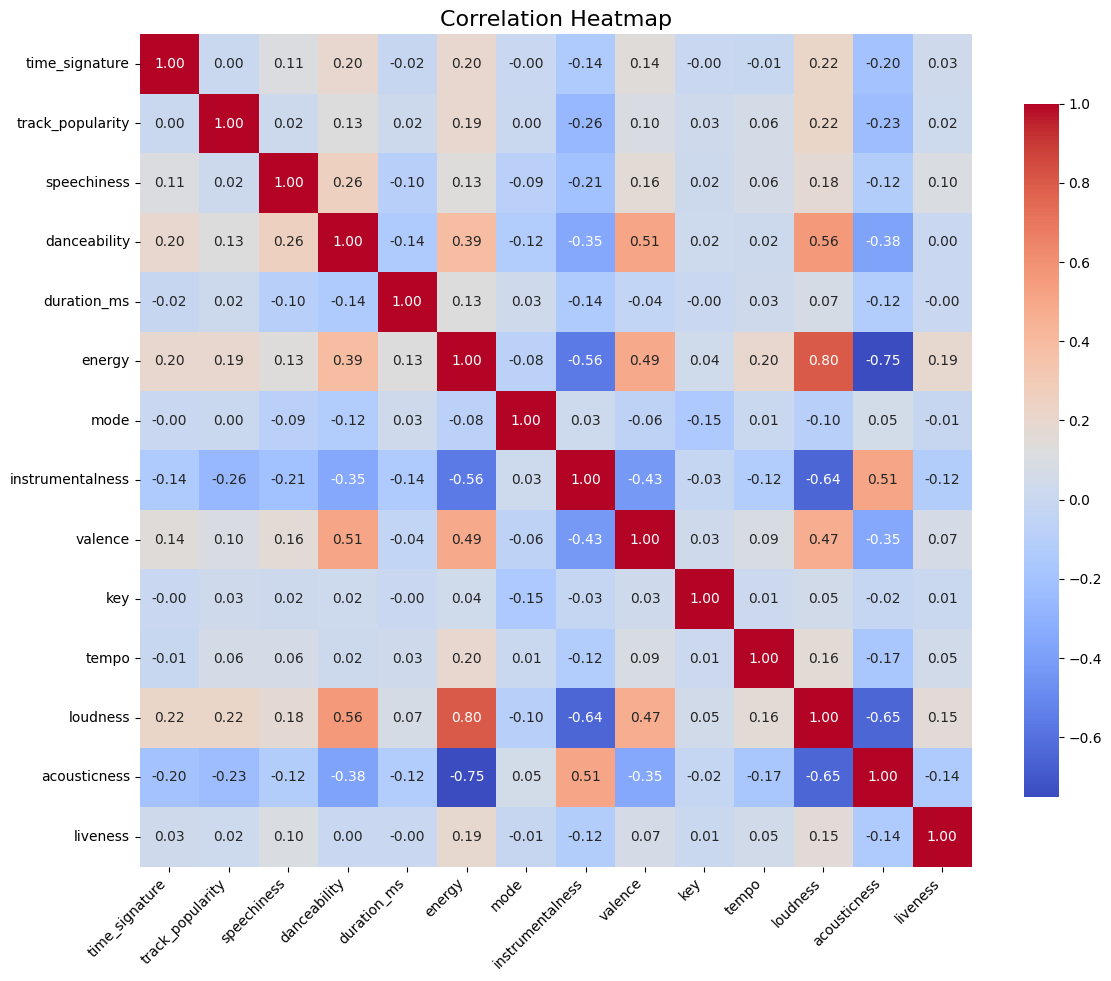

In [13]:
# Correlation heatmap for numeric features
numeric_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns
# Set up the figure size
plt.figure(figsize=(12, 10))
# Create the correlation matrix
correlation_matrix = combined_df[numeric_cols].corr()
# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
# Add title and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


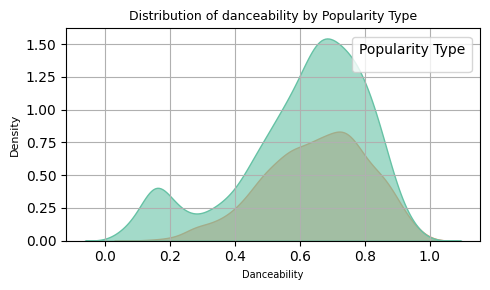

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


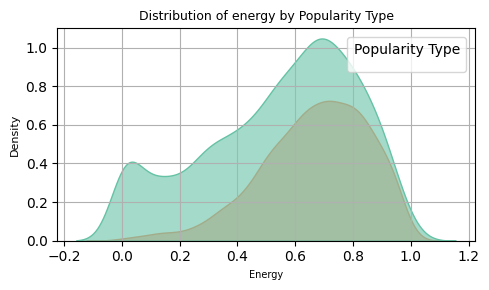

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


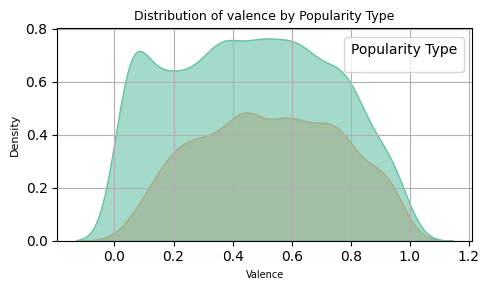

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


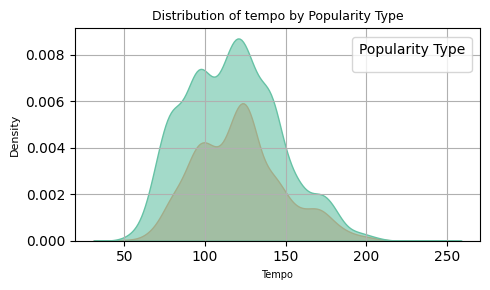

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


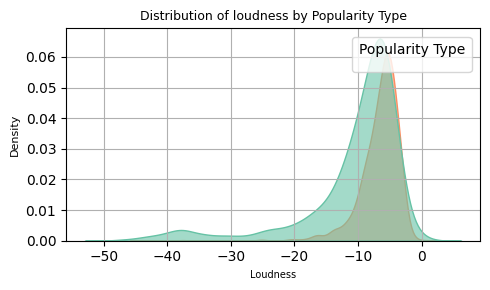

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


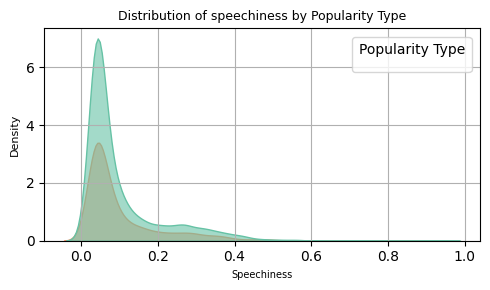

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


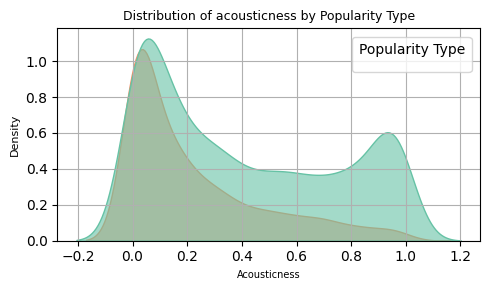

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


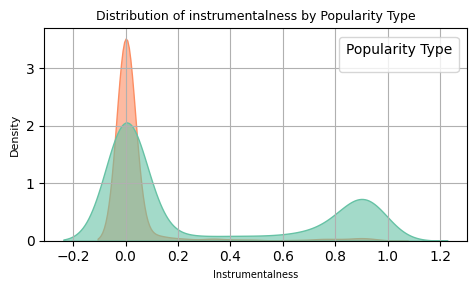

In [14]:
# Distribution of audio features by popularity type
audio_features = ['danceability', 'energy', 'valence', 'tempo', 'loudness', 'speechiness', 'acousticness', 'instrumentalness']

# Set up the color palette for better visualization
palette = sns.color_palette("Set2")

for feature in audio_features:
    plt.figure(figsize=(5, 3))  # Adjusted figure size for better visibility
    sns.kdeplot(data=combined_df, x=feature, hue='Popularity_Type', fill=True, palette=palette, alpha=0.6)
    plt.title(f'Distribution of {feature} by Popularity Type', fontsize=9)
    plt.xlabel(feature.capitalize(), fontsize=7)  # Capitalize the feature name for better readability
    plt.ylabel('Density', fontsize=8)
    plt.legend(title='Popularity Type', fontsize=12)
    plt.grid(True)  # Add grid for better readability
    plt.tight_layout()  # Adjust layout to make room for labels
    plt.show()

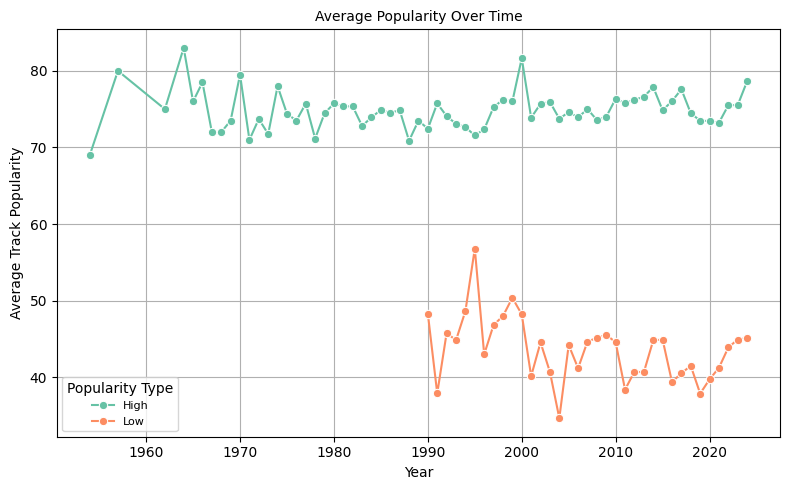

In [15]:
# Popularity trends over time
combined_df['year'] = combined_df['track_album_release_date'].dt.year
# Calculate average popularity by year and popularity type
popularity_trend = combined_df.groupby(['year', 'Popularity_Type'])['track_popularity'].mean().reset_index()
# Set up the figure
plt.figure(figsize=(8, 5))
# Create the line plot
sns.lineplot(data=popularity_trend, x='year', y='track_popularity', hue='Popularity_Type', marker='o', palette='Set2')
# Add title and labels
plt.title('Average Popularity Over Time', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Average Track Popularity', fontsize=10)
plt.grid(True)  # Add grid for better readability
plt.legend(title='Popularity Type', fontsize=8)
# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

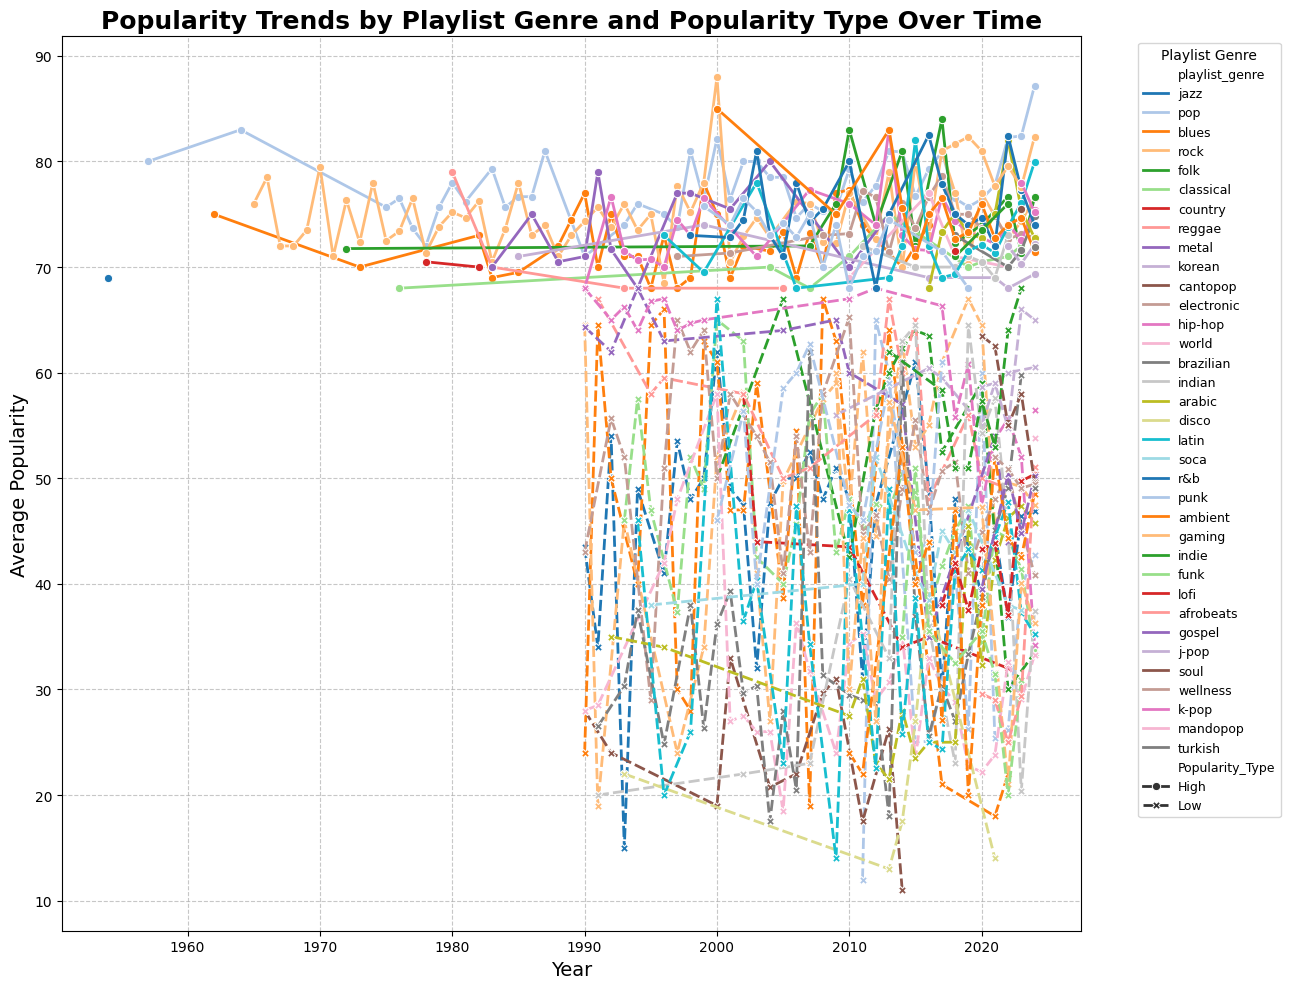

In [16]:
# Group data by year, playlist genre, and popularity type to calculate average popularity
popularity_trends = (
    combined_df.groupby(['year', 'playlist_genre', 'Popularity_Type'])['track_popularity']
    .mean()
    .reset_index()
)
# Plot popularity trends
plt.figure(figsize=(13, 10))
# Create the line plot with enhanced aesthetics
sns.lineplot(
    data=popularity_trends,
    x='year',
    y='track_popularity',
    hue='playlist_genre',
    style='Popularity_Type',
    markers=True,
    dashes=True,
    palette='tab20',
    linewidth=2,  # Set line width for better visibility
)
# Add title and labels with improved formatting
plt.title('Popularity Trends by Playlist Genre and Popularity Type Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Popularity', fontsize=14)
# Customize legend
plt.legend(title='Playlist Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)  # Dashed grid lines for better visibility
# Adjust layout to make room for labels
plt.tight_layout()
# Show the plot
plt.show()

In [17]:
# Group by year and genre, calculate average popularity
genre_popularity = (combined_df.groupby(['year', 'playlist_genre'])['track_popularity'].mean().reset_index())
# Find the most and least popular genre per year
most_popular_genres = genre_popularity.loc[genre_popularity.groupby('year')['track_popularity'].idxmax()]
least_popular_genres = genre_popularity.loc[genre_popularity.groupby('year')['track_popularity'].idxmin()]
# Merge results for better comparison
popularity_summary = pd.merge(
    most_popular_genres,
    least_popular_genres,
    on='year',
    suffixes=('_most', '_least')
)
# Display the result
print(popularity_summary)

    year playlist_genre_most  track_popularity_most playlist_genre_least  \
0   1954                jazz              69.000000                 jazz   
1   1957                 pop              80.000000                  pop   
2   1962               blues              75.000000                blues   
3   1964                 pop              83.000000                  pop   
4   1965                rock              76.000000                 rock   
..   ...                 ...                    ...                  ...   
59  2020                 r&b              74.666667                world   
60  2021              gaming              77.666667                disco   
61  2022                 r&b              82.400000                 funk   
62  2023               k-pop              78.000000               indian   
63  2024                 pop              77.103093                world   

    track_popularity_least  
0                69.000000  
1                80.000000  


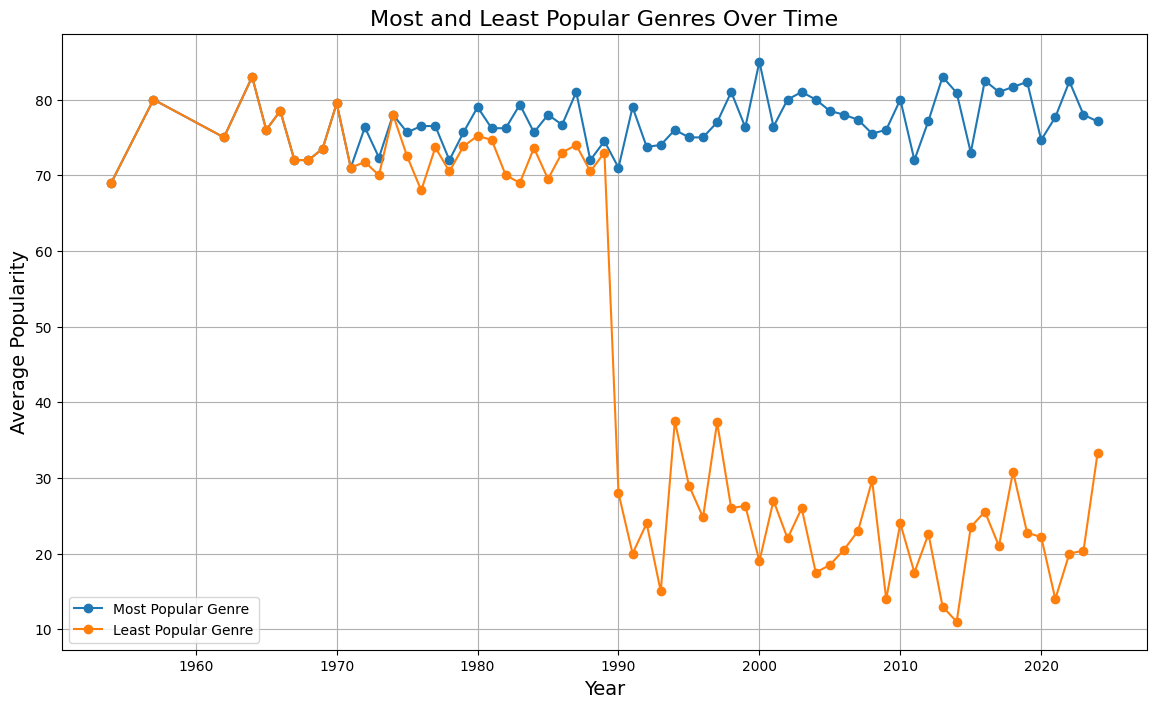

In [18]:
plt.figure(figsize=(14, 8))
plt.plot(popularity_summary['year'], popularity_summary['track_popularity_most'], label='Most Popular Genre', marker='o')
plt.plot(popularity_summary['year'], popularity_summary['track_popularity_least'], label='Least Popular Genre', marker='o')
plt.title('Most and Least Popular Genres Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Popularity', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

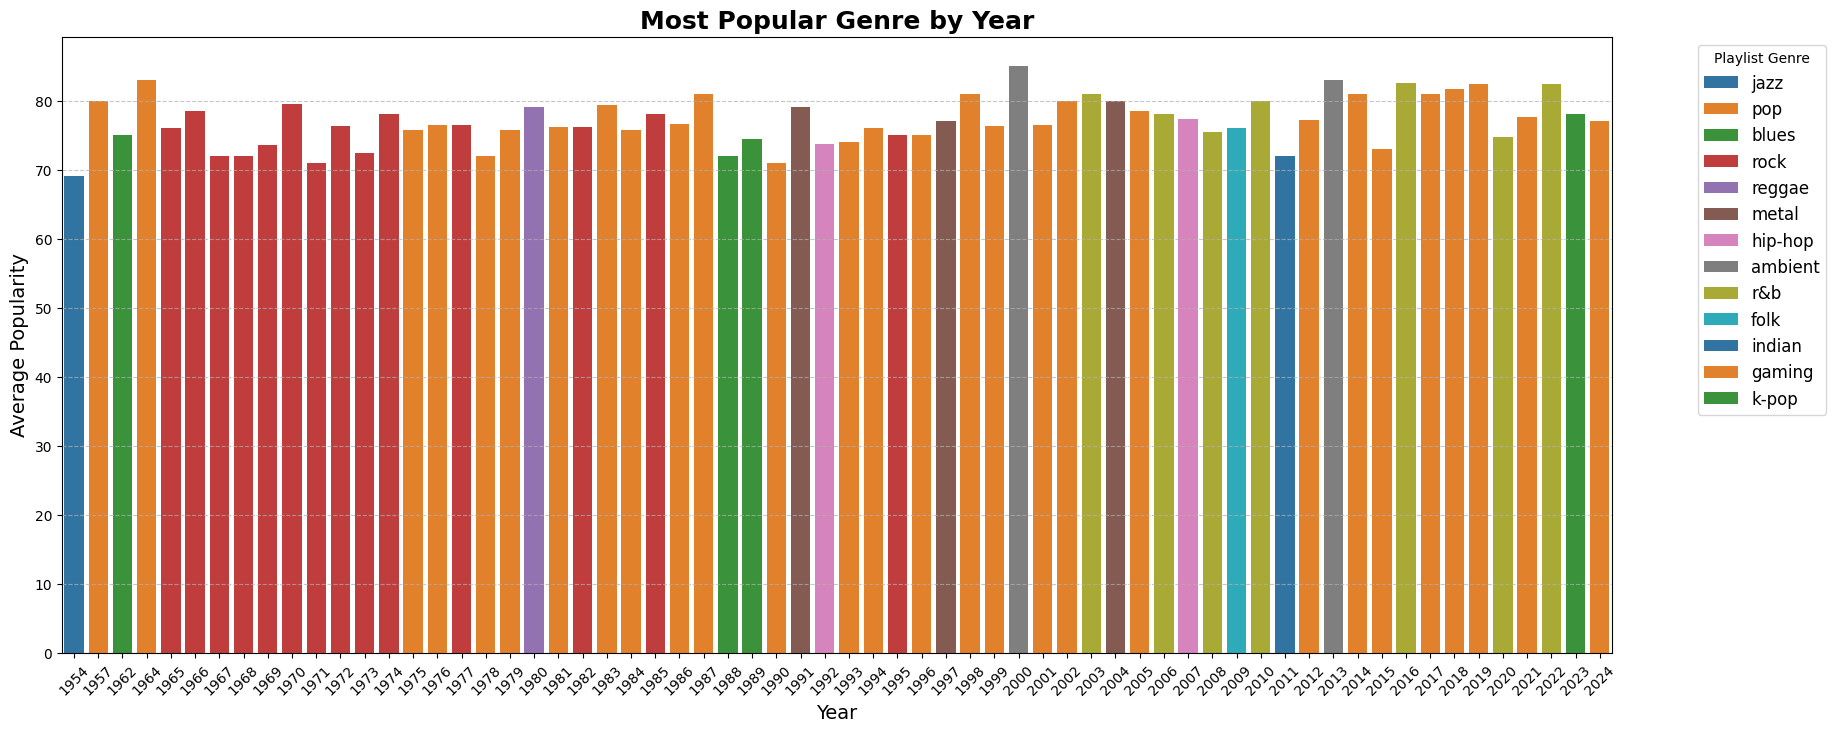

In [19]:
# Plot the most popular genres over time
plt.figure(figsize=(20, 8))
# Create the bar plot with enhanced aesthetics
sns.barplot(
    data=most_popular_genres,
    x='year',
    y='track_popularity',
    hue='playlist_genre',
    dodge=False,
    palette='tab10',
    ci=None  # Disable confidence intervals for cleaner bars
)
# Add title and labels with improved formatting
plt.title('Most Popular Genre by Year', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Popularity', fontsize=14)
# Adjust x-ticks for better readability
plt.xticks(rotation=45)
# Customize legend
plt.legend(title='Playlist Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

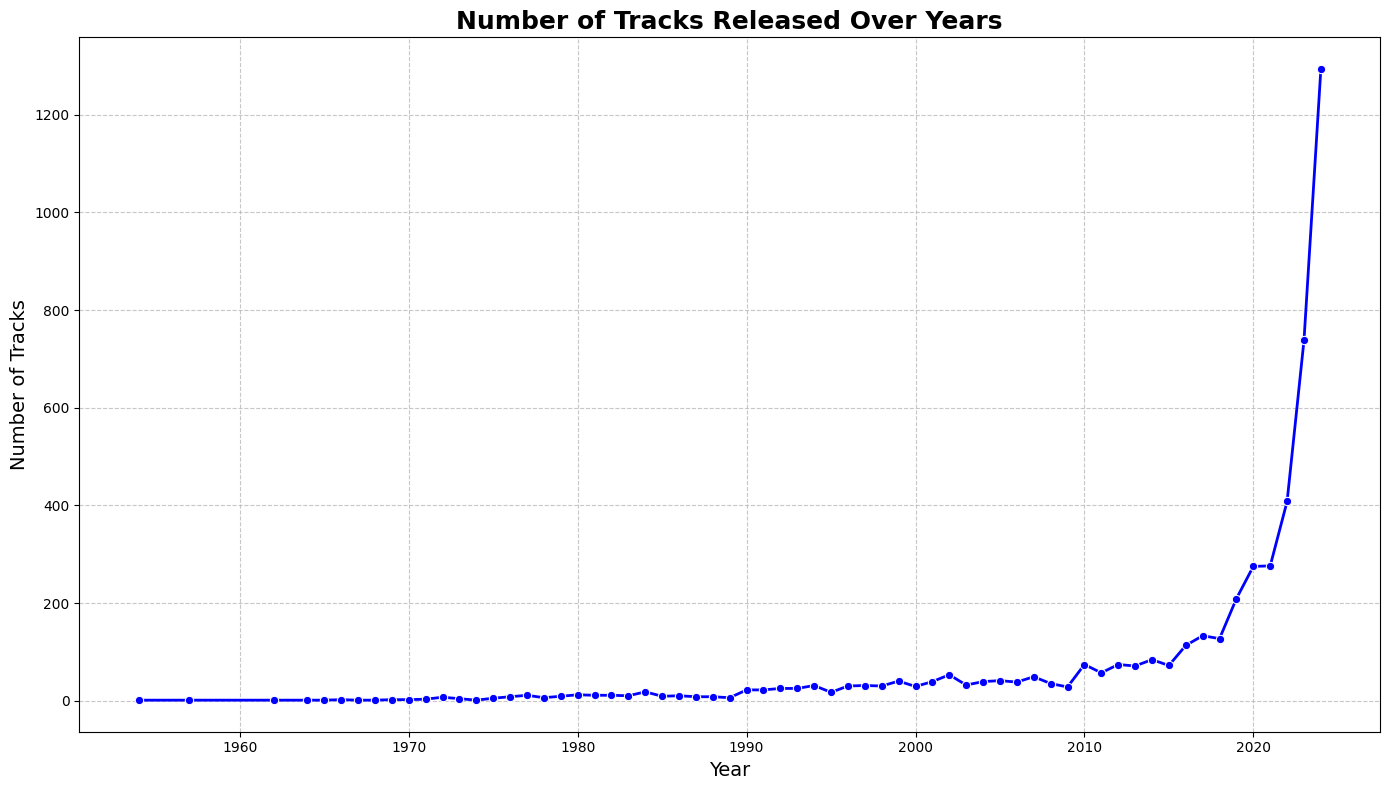

In [20]:
# Count the number of tracks released per year
tracks_per_year = combined_df.groupby('year').size().reset_index(name='track_count')
# Plot the number of tracks released over years
plt.figure(figsize=(14, 8))
# Create the line plot with enhanced aesthetics
sns.lineplot(data=tracks_per_year, x='year', y='track_count', marker='o', color='blue', linewidth=2)
# Add title and labels with improved formatting
plt.title('Number of Tracks Released Over Years', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Tracks', fontsize=14)
# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)  # Dashed grid lines for better visibility
# Adjust layout to make room for labels
plt.tight_layout()
# Show the plot
plt.show()

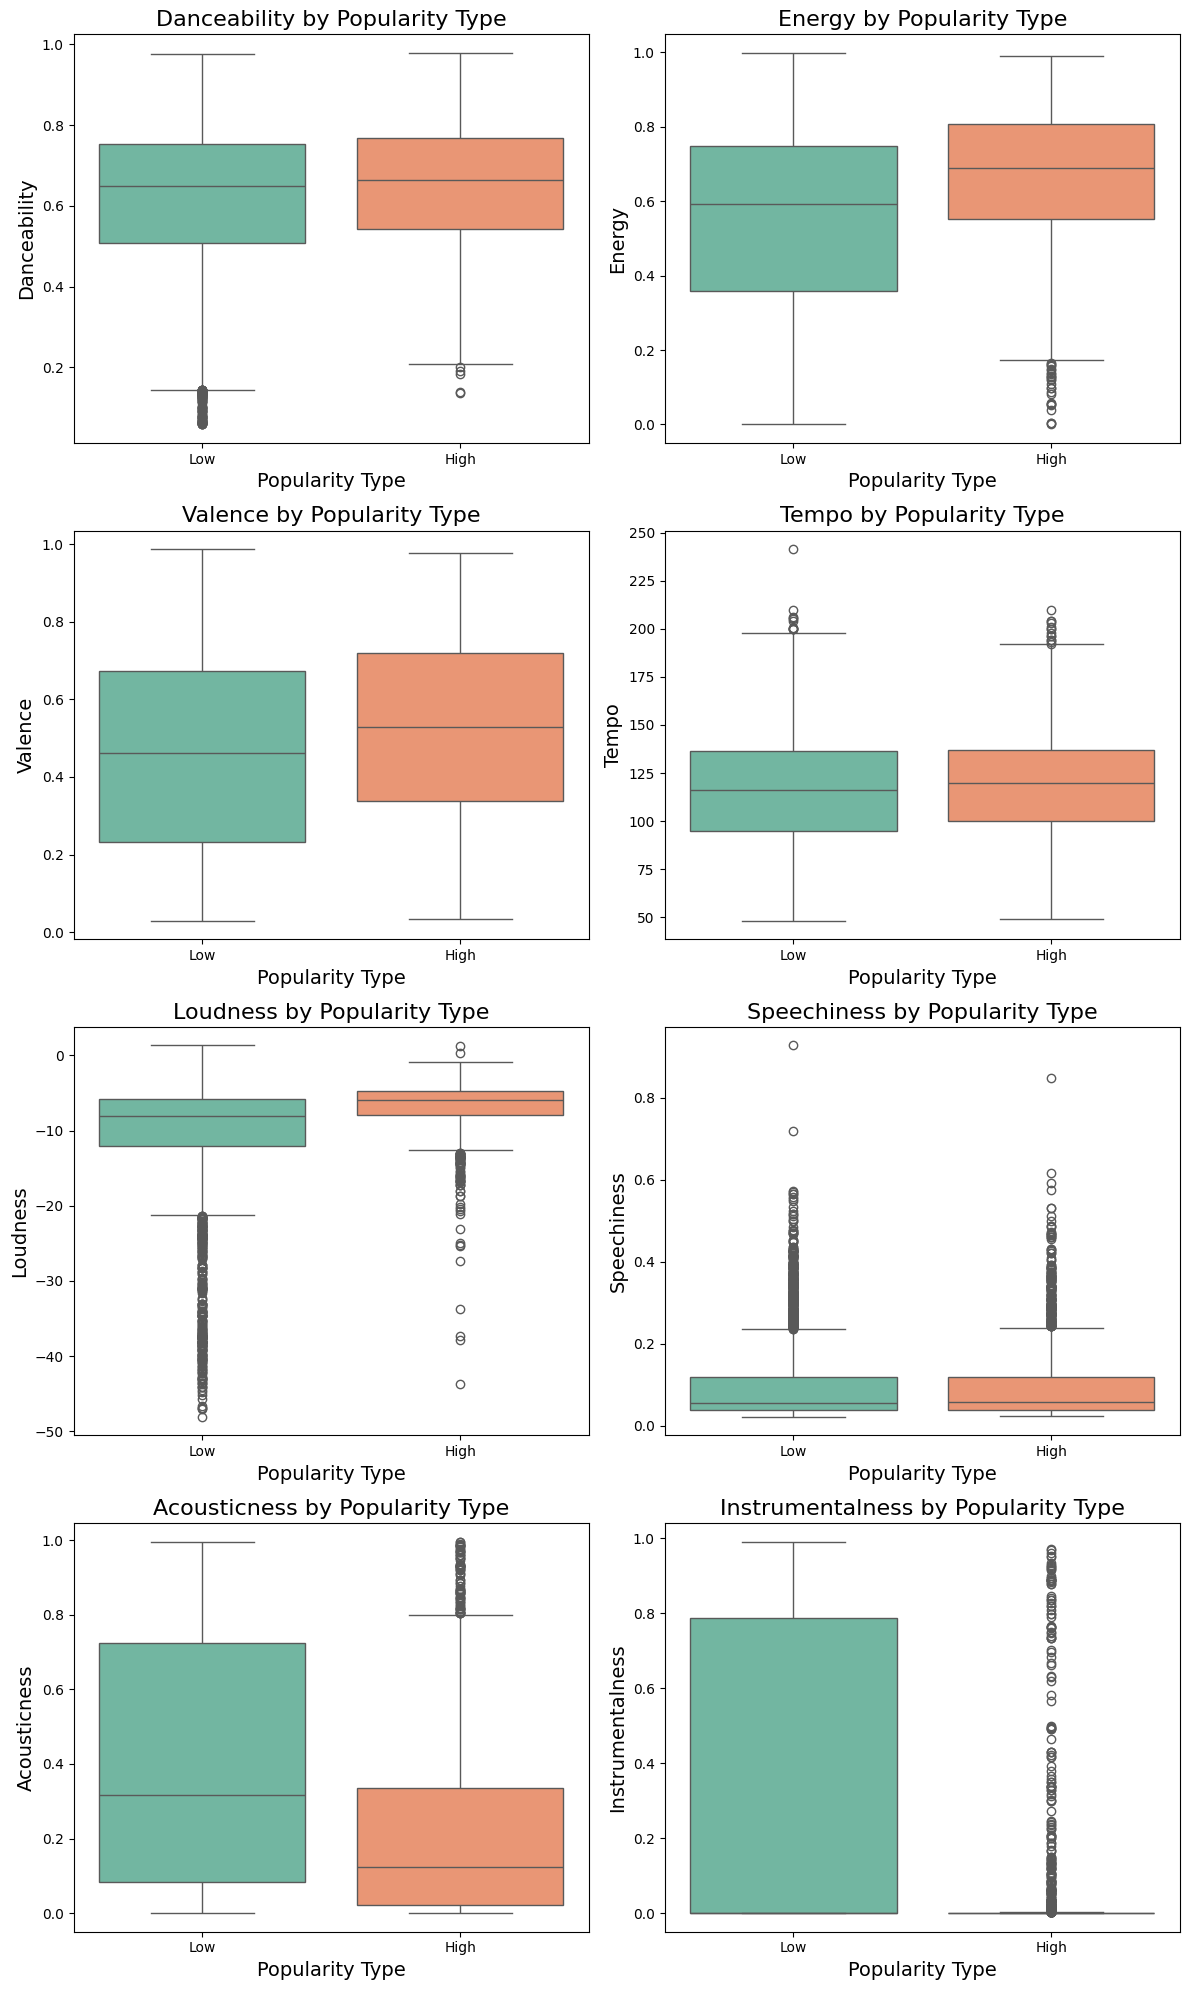

In [21]:
# Set up the figure for box plots
plt.figure(figsize=(12, 20))
# Loop through audio features to create subplots
for i, feature in enumerate(audio_features):
    plt.subplot(4, 2, i + 1)
    # Create the box plot
    sns.boxplot(data=combined_df, x='Popularity_Type', y=feature, palette='Set2')
    # Add title and labels with improved formatting
    plt.title(f'{feature.capitalize()} by Popularity Type', fontsize=16)
    plt.xlabel('Popularity Type', fontsize=14)
    plt.ylabel(feature.capitalize(), fontsize=14)
# Adjust layout to make room for labels
plt.tight_layout()
# Show the plot
plt.show()

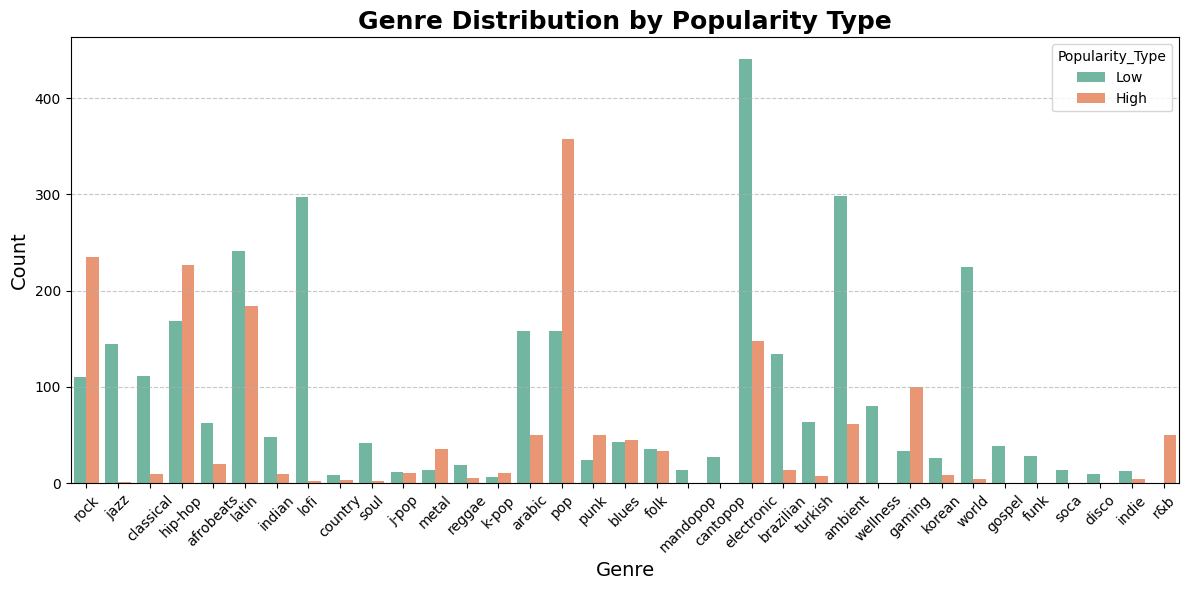

In [22]:
# Count plot for genres by popularity type
plt.figure(figsize=(12, 6))
# Create the count plot with enhanced aesthetics
sns.countplot(data=combined_df, x='playlist_genre', hue='Popularity_Type', palette='Set2')
# Add title and labels with improved formatting
plt.title('Genre Distribution by Popularity Type', fontsize=18, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
# Adjust x-ticks for better readability
plt.xticks(rotation=45)
# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

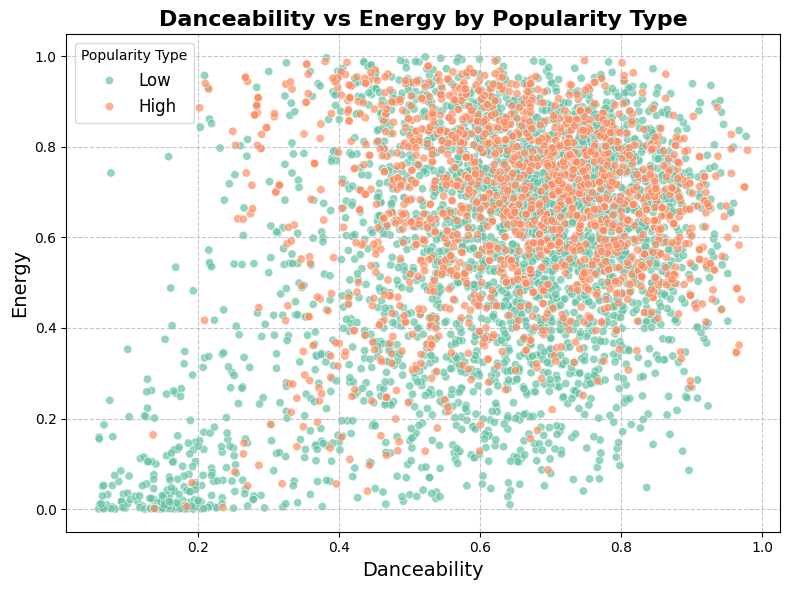

In [23]:
# Scatter plot for danceability vs energy
plt.figure(figsize=(8, 6))
# Create the scatter plot with enhanced aesthetics
sns.scatterplot(data=combined_df, x='danceability', y='energy', hue='Popularity_Type', alpha=0.7, palette='Set2', edgecolor='w')
# Add title and labels with improved formatting
plt.title('Danceability vs Energy by Popularity Type', fontsize=16, fontweight='bold')
plt.xlabel('Danceability', fontsize=14)
plt.ylabel('Energy', fontsize=14)
# Customize legend
plt.legend(title='Popularity Type', fontsize=12)
# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)  # Dashed grid lines for better visibility
# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

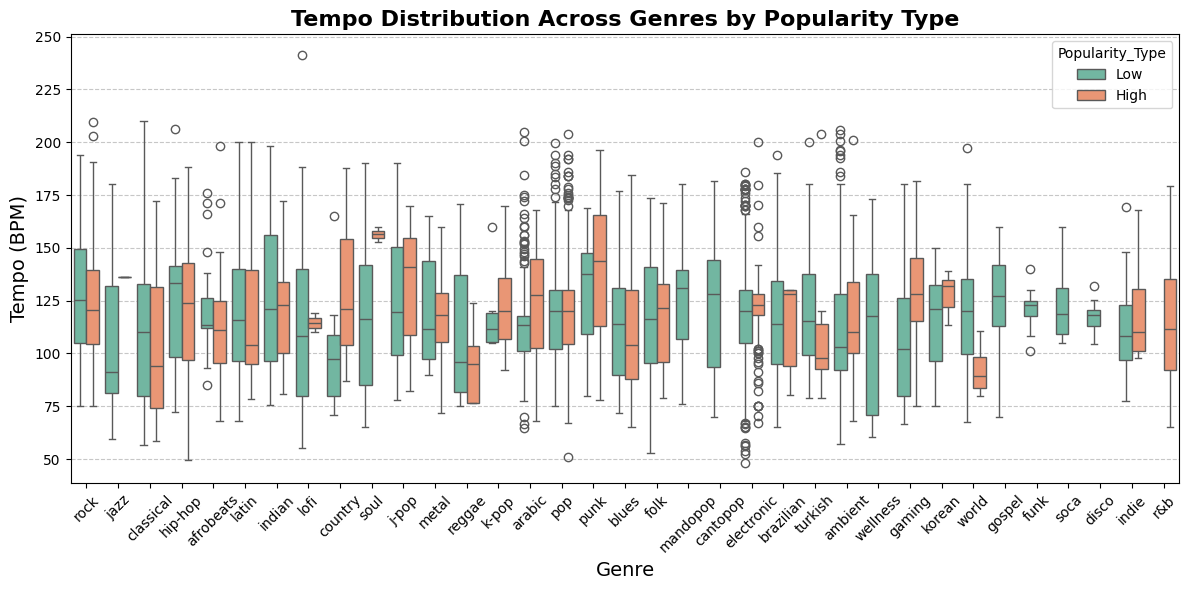

In [24]:
# Boxplot for tempo across genres
plt.figure(figsize=(12, 6))
# Create the box plot with enhanced aesthetics
sns.boxplot(data=combined_df, x='playlist_genre', y='tempo', hue='Popularity_Type', palette='Set2')
# Add title and labels with improved formatting
plt.title('Tempo Distribution Across Genres by Popularity Type', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Tempo (BPM)', fontsize=14)
# Adjust x-ticks for better readability
plt.xticks(rotation=45)
# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

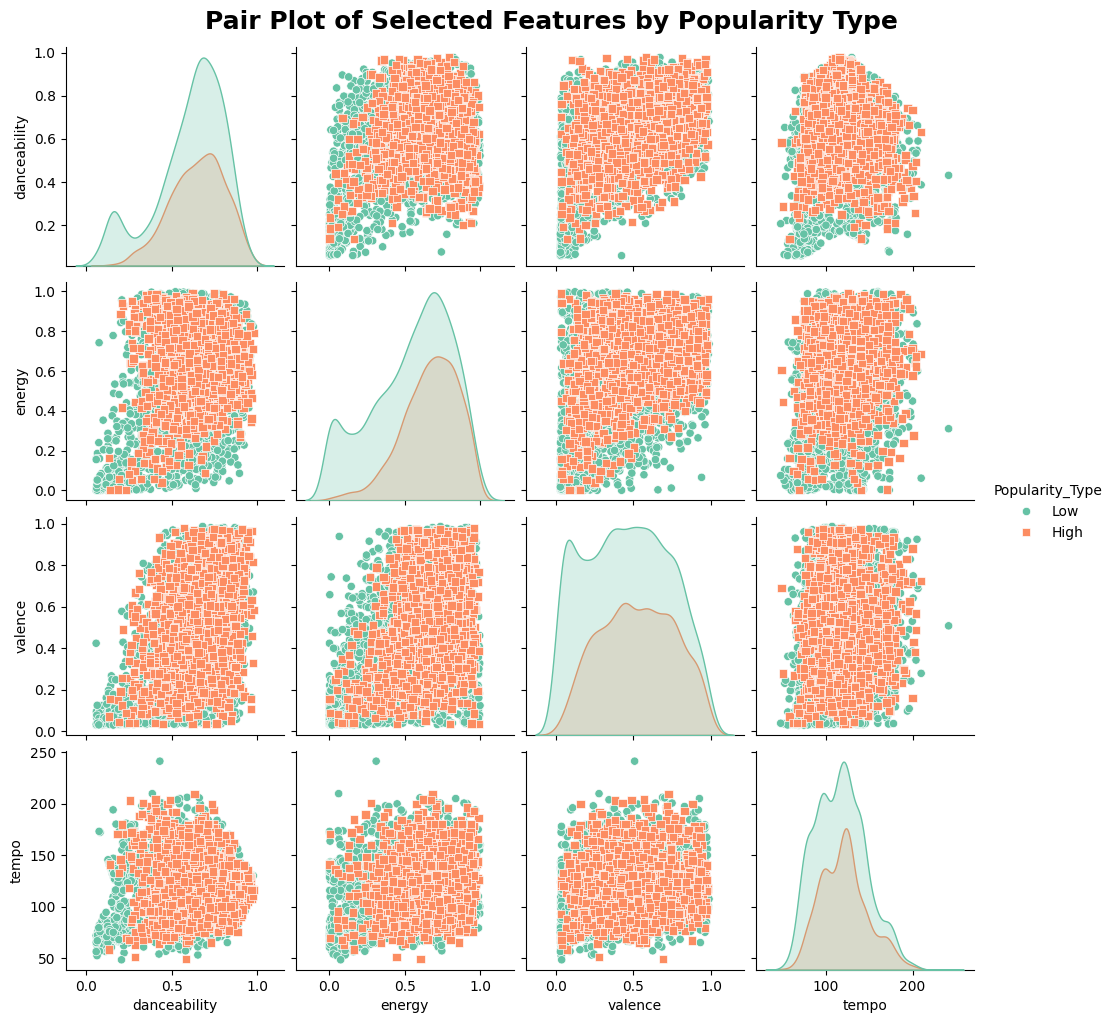

In [25]:
# Select a subset of numerical features
selected_features = ['danceability', 'energy', 'valence', 'tempo']
# Create the pair plot with enhanced aesthetics
pair_plot = sns.pairplot(
    combined_df[selected_features + ['Popularity_Type']],
    hue='Popularity_Type',
    diag_kind='kde',
    palette='Set2',  # Specify a color palette for better distinction
    markers=["o", "s"],  # Different markers for different popularity types
)
# Add title with improved formatting
plt.suptitle('Pair Plot of Selected Features by Popularity Type', fontsize=18, fontweight='bold', y=1.02)
# Show the plot
plt.show()

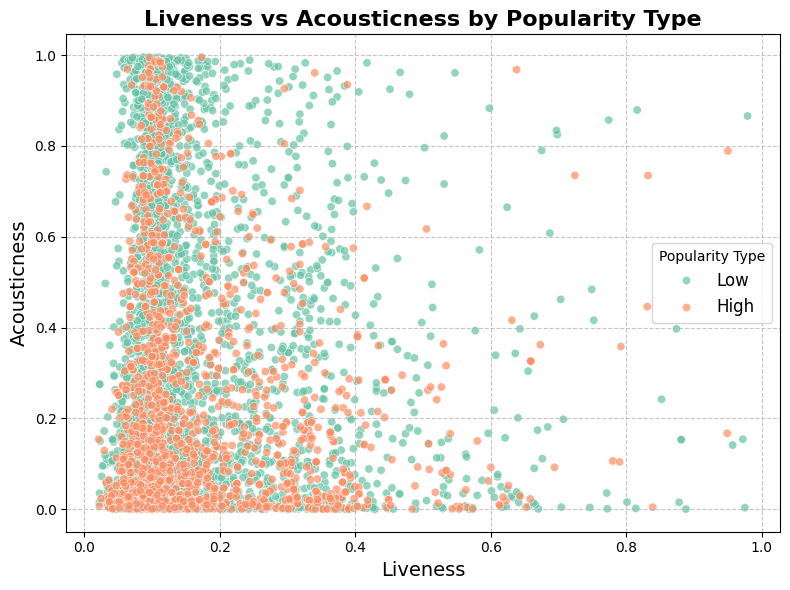

In [26]:
# Scatter plot for liveness vs acousticness
plt.figure(figsize=(8, 6))
# Create the scatter plot with enhanced aesthetics
sns.scatterplot(data=combined_df, x='liveness', y='acousticness', hue='Popularity_Type', alpha=0.7, palette='Set2', edgecolor='w')
# Add title and labels with improved formatting
plt.title('Liveness vs Acousticness by Popularity Type', fontsize=16, fontweight='bold')
plt.xlabel('Liveness', fontsize=14)
plt.ylabel('Acousticness', fontsize=14)
# Customize legend
plt.legend(title='Popularity Type', fontsize=12)
# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)  # Dashed grid lines for better visibility
# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

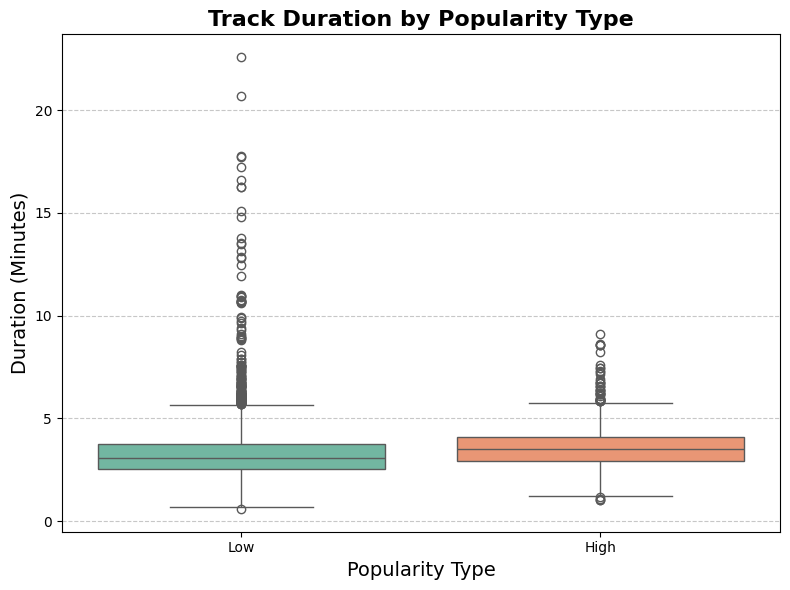

In [27]:
# Convert duration from milliseconds to minutes
combined_df['duration_min'] = combined_df['duration_ms'] / 60000
# Boxplot for duration in minutes by popularity type
plt.figure(figsize=(8, 6))
# Create the box plot with enhanced aesthetics
sns.boxplot(data=combined_df, x='Popularity_Type', y='duration_min', palette='Set2')
# Add title and labels with improved formatting
plt.title('Track Duration by Popularity Type', fontsize=16, fontweight='bold')
plt.xlabel('Popularity Type', fontsize=14)
plt.ylabel('Duration (Minutes)', fontsize=14)
# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [28]:
combined_df.head()

time_signature  track_popularity  speechiness  danceability  playlist_name  \
0             4.0                23       0.0393         0.636  Rock Classics   
1             4.0                53       0.0317         0.572  Rock Classics   
2             4.0                55       0.0454         0.591  Rock Classics   
3             4.0                64       0.1010         0.443  Jazz Classics   
4             4.0                62       0.0298         0.685  Jazz Classics   

                       track_artist  duration_ms  energy playlist_genre  \
0      Creedence Clearwater Revival     138053.0   0.746           rock   
1                         Van Halen     241600.0   0.835           rock   
2                      Stevie Nicks     329413.0   0.804           rock   
3  Ella Fitzgerald, Louis Armstrong     185160.0   0.104           jazz   
4                    Galt MacDermot     205720.0   0.472           jazz   

  playlist_subgenre  ... valence  key    tempo loudness acousticness liveness  \
0           classic  ...   0.432  0.0  132.310   -3.785       0.0648   0.1730   
1           classic  ...   0.795  0.0  129.981   -6.219       0.1710   0.0702   
2           classic  ...   0.658  0.0  111.457   -7.299       0.3270   0.0818   
3           classic  ...   0.394  0.0   76.474  -17.042       0.9130   0.1910   
4           classic  ...   0.475  9.0   80.487   -9.691       0.7850   0.2240   

                                    track_album_name Popularity_Type  year  \
0  The Long Road Home - The Ultimate John Fogerty...             Low  2005   
1                                     The Collection             Low  2015   
2                       Bella Donna (Deluxe Edition)             Low  2016   
3                                         Love, Ella             Low  2007   
4                  Shapes of Rhythm/Woman Is Sweeter             Low  2000   

  duration_min  
0     2.300883  
1     4.026667  
2     5.490217  
3     3.086000  
4     3.428667  

[5 rows x 32 columns]

In [29]:
from sklearn.preprocessing import StandardScaler
# Extract year from the release date
combined_df['release_year'] = combined_df['track_album_release_date'].dt.year
# Create a new feature: Song Age (current year - release year)
current_year = 2025  # Using the current year from the given date
combined_df['song_age'] = current_year - combined_df['release_year']
# Create interaction features
combined_df['energy_danceability_ratio'] = combined_df['energy'] / (combined_df['danceability'] + 1e-5)
combined_df['valence_energy_product'] = combined_df['valence'] * combined_df['energy']
# Create a binary feature for whether the track is from the 2000s or earlier
combined_df['is_2000s_or_earlier'] = (combined_df['release_year'] <= 2000).astype(int)
# Scale numerical features
scaler = StandardScaler()
numerical_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                      'instrumentalness', 'liveness', 'valence', 'tempo', 'song_age']
combined_df[numerical_features] = scaler.fit_transform(combined_df[numerical_features])
# Drop rows with missing values after feature engineering
combined_df = combined_df.dropna()
# Save the engineered dataset for modeling
combined_df.to_csv('engineered_spotify_data_1.csv', index=False)
# Display the first few rows of the engineered DataFrame for verification
combined_df.head()

time_signature  track_popularity  speechiness  danceability  playlist_name  \
0             4.0                23    -0.618073      0.072936  Rock Classics   
1             4.0                53    -0.693304     -0.268059  Rock Classics   
2             4.0                55    -0.557689     -0.166826  Rock Classics   
3             4.0                64    -0.007310     -0.955376  Jazz Classics   
4             4.0                62    -0.712112      0.334010  Jazz Classics   

                       track_artist  duration_ms    energy playlist_genre  \
0      Creedence Clearwater Revival     138053.0  0.646974           rock   
1                         Van Halen     241600.0  1.008414           rock   
2                      Stevie Nicks     329413.0  0.882519           rock   
3  Ella Fitzgerald, Louis Armstrong     185160.0 -1.960270           jazz   
4                    Galt MacDermot     205720.0 -0.465775           jazz   

  playlist_subgenre  ...  liveness  \
0           classic  ...  0.043296   
1           classic  ... -0.782960   
2           classic  ... -0.689725   
3           classic  ...  0.187971   
4           classic  ...  0.453209   

                                    track_album_name  Popularity_Type  year  \
0  The Long Road Home - The Ultimate John Fogerty...              Low  2005   
1                                     The Collection              Low  2015   
2                       Bella Donna (Deluxe Edition)              Low  2016   
3                                         Love, Ella              Low  2007   
4                  Shapes of Rhythm/Woman Is Sweeter              Low  2000   

  duration_min release_year  song_age energy_danceability_ratio  \
0     2.300883         2005  1.096630                  1.172938   
1     4.026667         2015  0.164375                  1.459765   
2     5.490217         2016  0.071149                  1.360383   
3     3.086000         2007  0.910179                  0.234758   
4     3.428667         2000  1.562757                  0.689041   

   valence_energy_product is_2000s_or_earlier  
0                0.322272                   0  
1                0.663825                   0  
2                0.529032                   0  
3                0.040976                   0  
4                0.224200                   1  

[5 rows x 37 columns]

F1 Score: 0.8460
Accuracy: 0.7795
Recall: 0.9300
ROC AUC: 0.7143


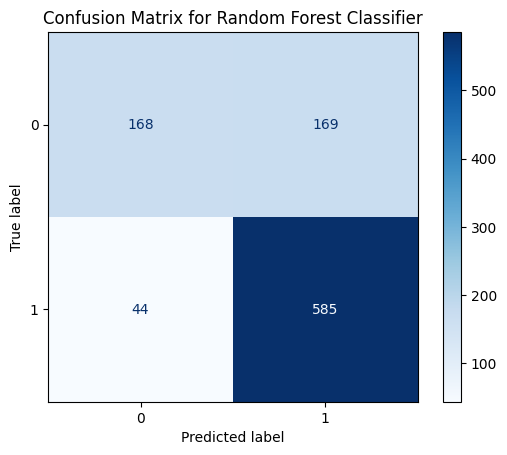

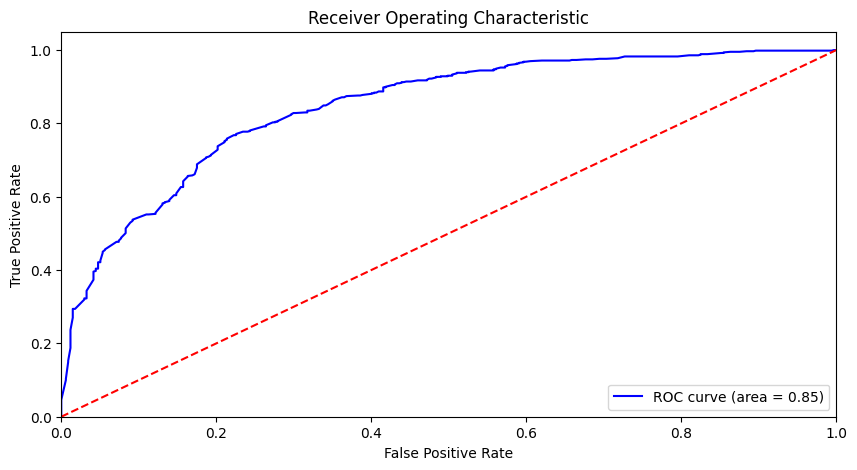

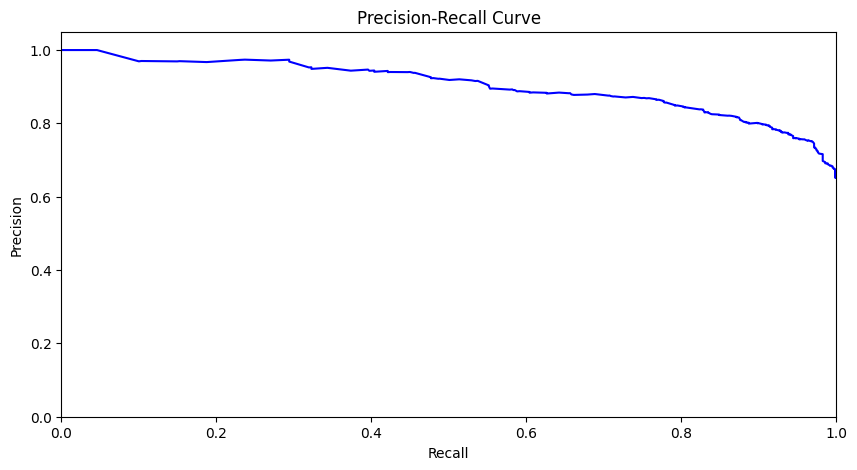

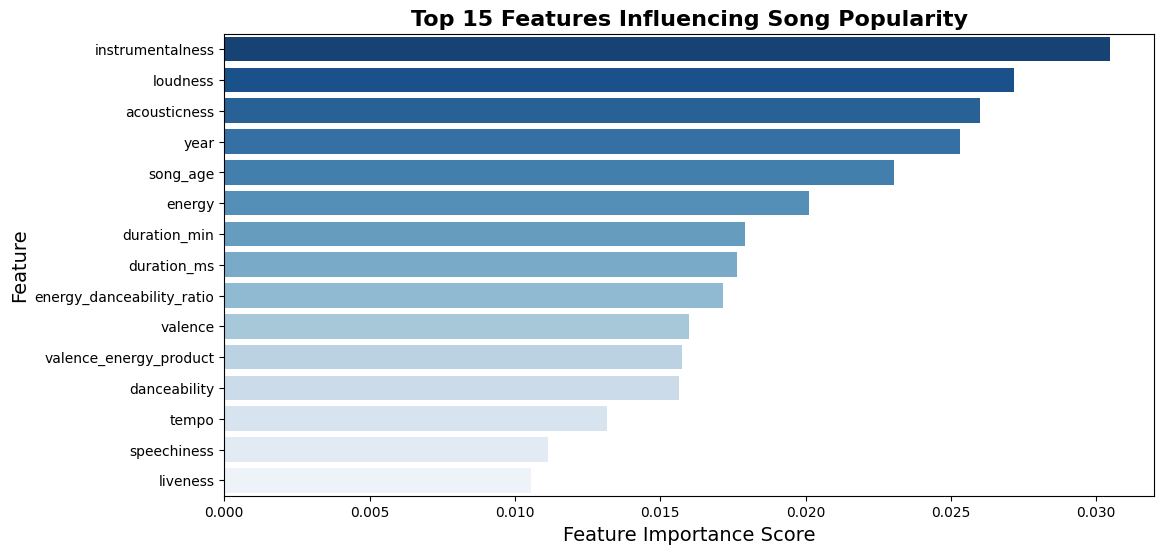

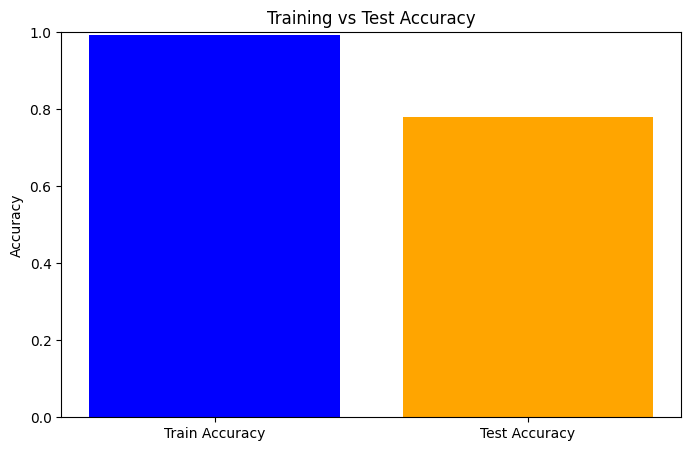

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (f1_score, accuracy_score, recall_score, 
                             roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
                             roc_curve, auc, precision_recall_curve)
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Load your dataset
combined_df = pd.read_csv('engineered_spotify_data_1.csv')
# Define features and target variable
X = combined_df.drop(columns=['Popularity_Type', 'track_album_release_date', 'release_year','track_popularity','playlist_genre','playlist_id','playlist_subgenre','playlist_name'])
# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables into dummy/indicator variables
# Encode the target variable (Popularity_Type)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(combined_df['Popularity_Type'])  # Converts 'Low' and 'High' to 0 and 1
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize Random Forest Classifier
RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)
# Train the model
RF_model.fit(X_train_scaled, y_train)
# Make predictions
y_pred = RF_model.predict(X_test_scaled)
y_train_pred = RF_model.predict(X_train_scaled)
# Calculate evaluation metrics
rf_f1 = f1_score(y_test, y_pred)
rf_acc = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)
# Print evaluation metrics
print(f'F1 Score: {rf_f1:.4f}')
print(f'Accuracy: {rf_acc:.4f}')
print(f'Recall: {rf_recall:.4f}')
print(f'ROC AUC: {rf_auc:.4f}')
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()
# ROC Curve
y_scores = RF_model.predict_proba(X_test_scaled)[:, 1]  # Get the probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
# Plot ROC Curve
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
# Plot Precision-Recall Curve
plt.figure(figsize=(10, 5))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()
# Get feature importance scores from the trained model
feature_importances = RF_model.feature_importances_
# Get feature names (excluding 'track_popularity')
feature_names = X.columns  # Ensure 'track_popularity' is not in X
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
# Sort features by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Select the top 15 important features
top_features = importance_df.head(15)
# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='Blues_r')
# Add titles and labels
plt.title('Top 15 Features Influencing Song Popularity', fontsize=16, fontweight='bold')
plt.xlabel('Feature Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
# Show the plot
plt.show()
# Function to visualize training vs validation performance
def train_val(y_train, y_train_pred, y_test, y_pred):
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_pred)
    plt.figure(figsize=(8, 5))
    plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc], color=['blue', 'orange'])
    plt.ylim(0, 1)
    plt.ylabel('Accuracy')
    plt.title('Training vs Test Accuracy')
    plt.show()
# Call the function to visualize training vs validation performance
train_val(y_train, y_train_pred, y_test, y_pred)

F1 Score: 0.7423
Accuracy: 0.6894
Recall: 0.6868
ROC AUC: 0.6906


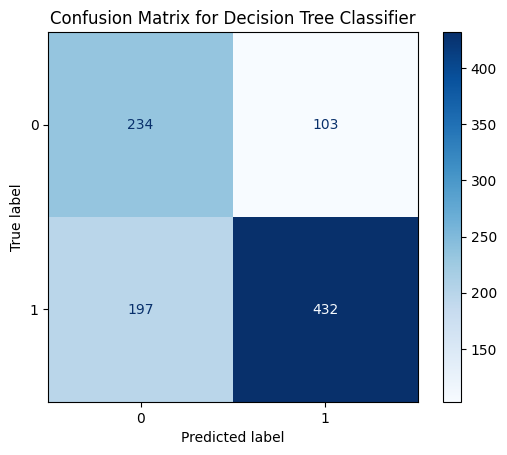

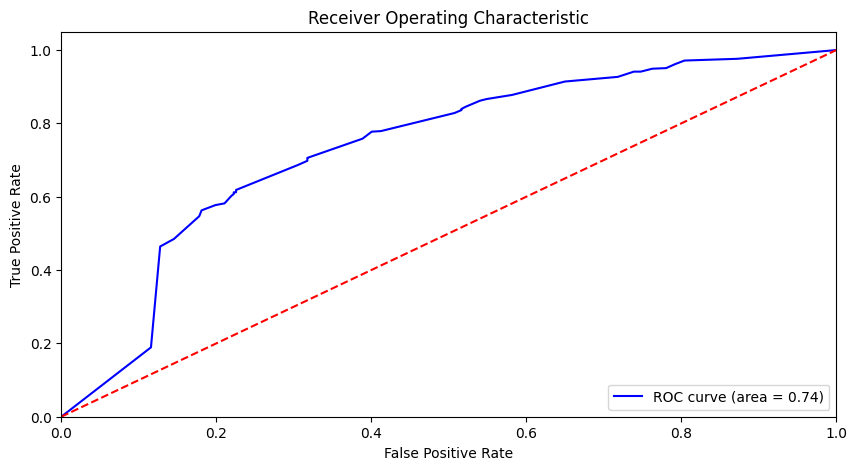

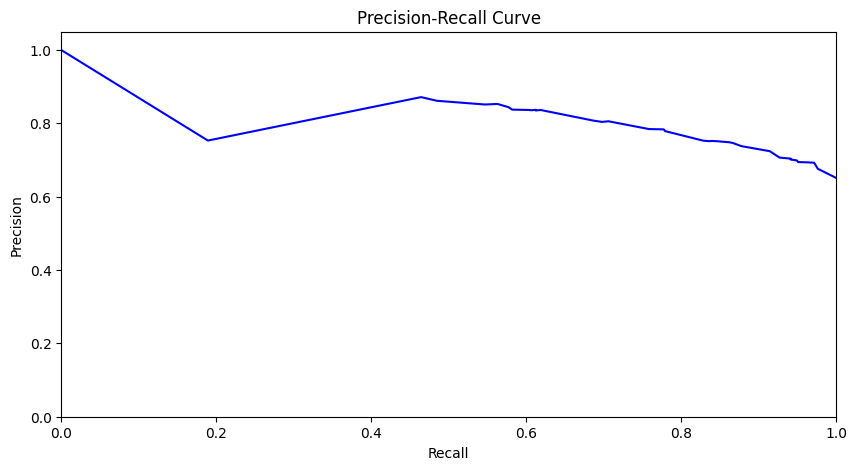

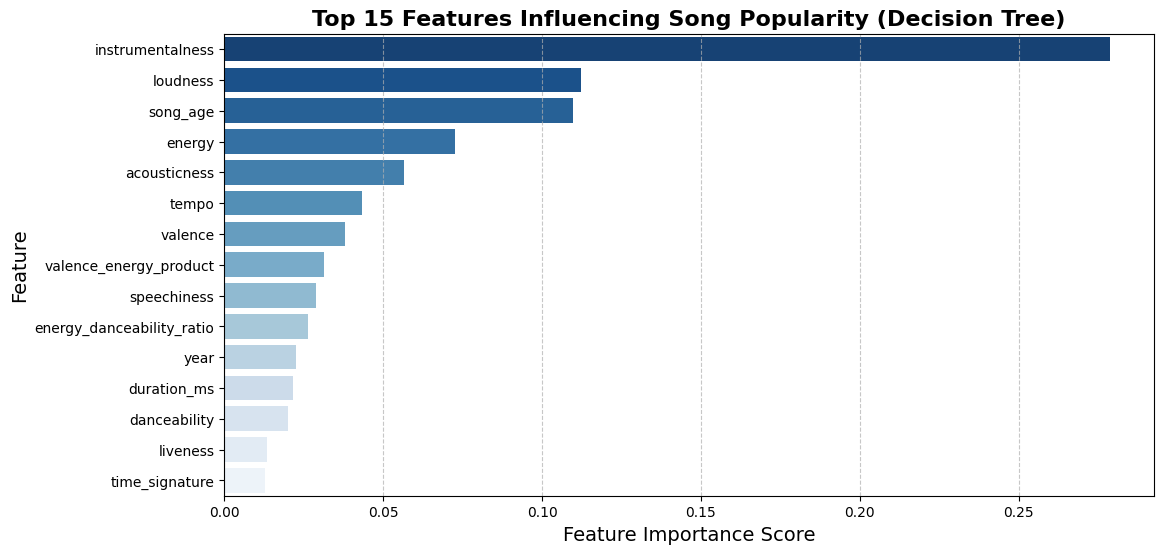

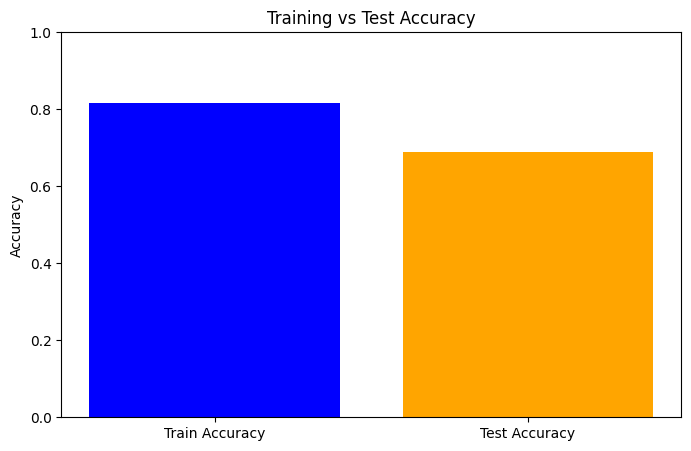

In [31]:
from sklearn.tree import DecisionTreeClassifier
# Load dataset
combined_df = pd.read_csv('engineered_spotify_data_1.csv')
# Define features and target variable
X = combined_df.drop(columns=['Popularity_Type', 'track_album_release_date', 'release_year','track_popularity','playlist_name','playlist_subgenre','playlist_genre','playlist_id','track_id'])
# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)  
# Encode the target variable (Popularity_Type)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(combined_df['Popularity_Type'])  # Converts 'Low' and 'High' to 0 and 1
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize Decision Tree Classifier
DT_model = DecisionTreeClassifier(class_weight="balanced", random_state=101, max_depth=10)
# Train the model
DT_model.fit(X_train_scaled, y_train)
# Make predictions
y_pred = DT_model.predict(X_test_scaled)
y_train_pred = DT_model.predict(X_train_scaled)
# Compute evaluation metrics
dt_f1 = f1_score(y_test, y_pred)
dt_acc = accuracy_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred)
# Print evaluation results
print(f'F1 Score: {dt_f1:.4f}')
print(f'Accuracy: {dt_acc:.4f}')
print(f'Recall: {dt_recall:.4f}')
print(f'ROC AUC: {dt_auc:.4f}')
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()
# ROC Curve
y_scores = DT_model.predict_proba(X_test_scaled)[:, 1]  
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(10, 5))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()
# Extract feature importances correctly
feature_importances = DT_model.feature_importances_
feature_names = X.columns  # Get the feature names
# Convert to DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
# Remove zero-importance features (optional)
importance_df = importance_df[importance_df['Importance'] > 0]
# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Select top 15 features
top_features = importance_df.head(15)
# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='Blues_r')
plt.title('Top 15 Features Influencing Song Popularity (Decision Tree)', fontsize=16, fontweight='bold')
plt.xlabel('Feature Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
# Show the plot
plt.show()
# Function to visualize training vs validation performance
def train_val(y_train, y_train_pred, y_test, y_pred):
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_pred)
    plt.figure(figsize=(8, 5))
    plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc], color=['blue', 'orange'])
    plt.ylim(0, 1)
    plt.ylabel('Accuracy')
    plt.title('Training vs Test Accuracy')
    plt.show()
# Call the function to visualize training vs validation performance
train_val(y_train, y_train_pred, y_test, y_pred)

F1 Score: 0.7292
Accuracy: 0.6770
Recall: 0.6677
ROC AUC: 0.6810


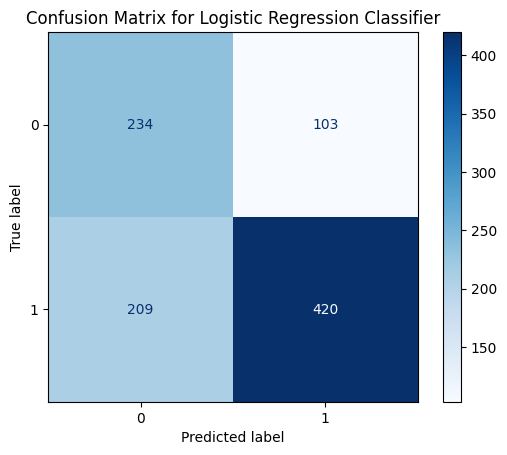

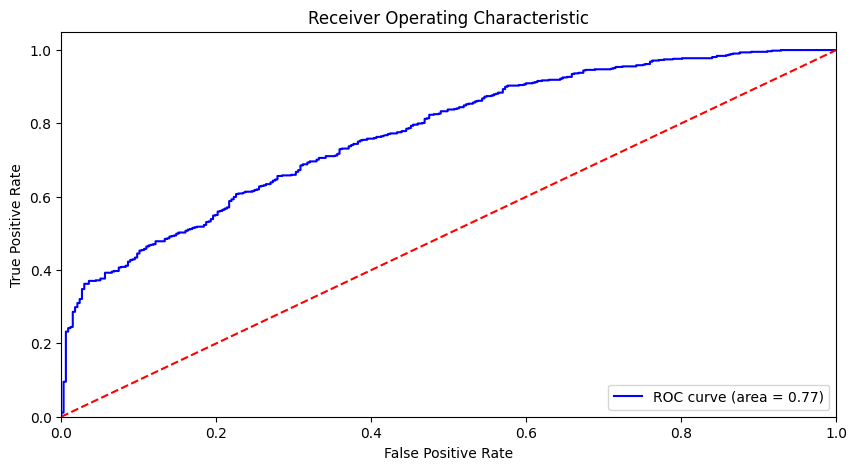

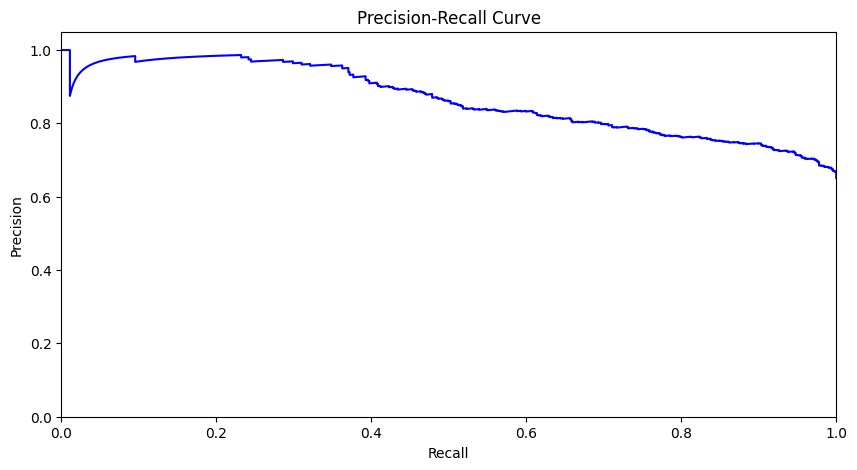

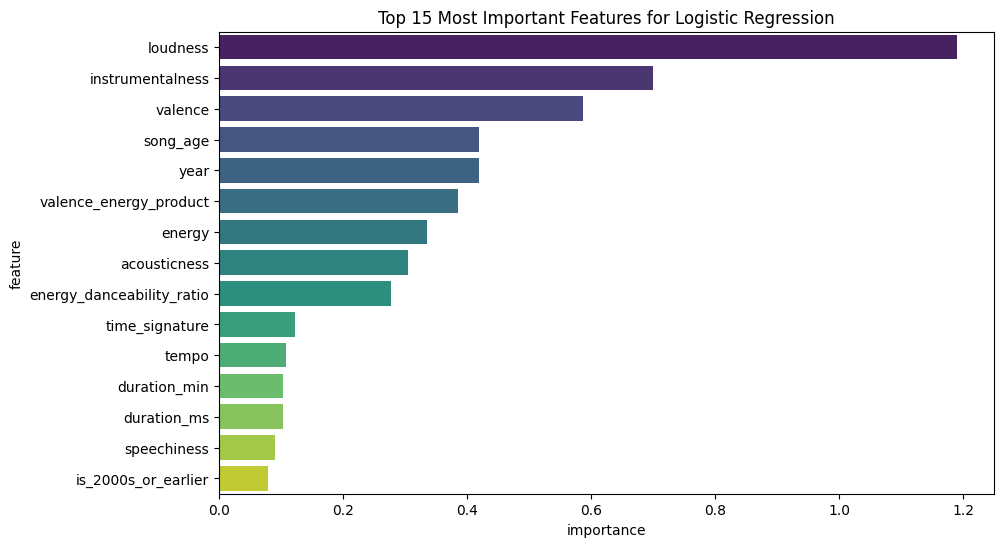

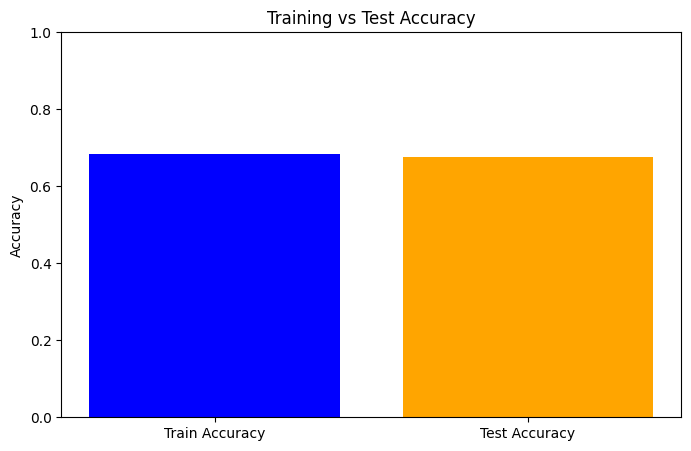

In [32]:
from sklearn.linear_model import LogisticRegression
# Load your dataset
combined_df = pd.read_csv('engineered_spotify_data_1.csv')
# Define features and target variable
X = combined_df.drop(columns=['Popularity_Type', 'track_album_release_date', 'release_year', 'track_id','track_album_name','track_popularity','playlist_name','playlist_subgenre','playlist_genre','playlist_id','track_id','track_album_id','id','analysis_url','uri','track_name','track_href','track_artist'])  # Exclude unwanted features
# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables into dummy/indicator variables
# Encode the target variable (Popularity_Type)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(combined_df['Popularity_Type'])  # Converts 'Low' and 'High' to 0 and 1
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize Logistic Regression model
log_reg_model = LogisticRegression(class_weight="balanced", solver='liblinear')
# Train the model
log_reg_model.fit(X_train_scaled, y_train)
# Make predictions
y_pred = log_reg_model.predict(X_test_scaled)
y_train_pred = log_reg_model.predict(X_train_scaled)
# Calculate evaluation metrics
log_reg_f1 = f1_score(y_test, y_pred)
log_reg_acc = accuracy_score(y_test, y_pred)
log_reg_recall = recall_score(y_test, y_pred)
log_reg_auc = roc_auc_score(y_test, y_pred)
# Print evaluation metrics
print(f'F1 Score: {log_reg_f1:.4f}')
print(f'Accuracy: {log_reg_acc:.4f}')
print(f'Recall: {log_reg_recall:.4f}')
print(f'ROC AUC: {log_reg_auc:.4f}')
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()
# ROC Curve
y_scores = log_reg_model.predict_proba(X_test_scaled)[:, 1]  # Get the probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
# Plot ROC Curve
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
# Plot Precision-Recall Curve
plt.figure(figsize=(10, 5))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()
# Feature Importance
# For Logistic Regression, feature importance can be derived from the coefficients
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(log_reg_model.coef_[0])  # Use absolute values of coefficients
}).sort_values('importance', ascending=False)
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15), palette='viridis')
plt.title('Top 15 Most Important Features for Logistic Regression')
plt.show()
# Function to visualize training vs validation performance
def train_val(y_train, y_train_pred, y_test, y_pred):
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_pred)
    plt.figure(figsize=(8, 5))
    plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc], color=['blue', 'orange'])
    plt.ylim(0, 1)
    plt.ylabel('Accuracy')
    plt.title('Training vs Test Accuracy')
    plt.show()
# Call the function to visualize training vs validation performance
train_val(y_train, y_train_pred, y_test, y_pred)

F1 Score: 0.7028
Accuracy: 0.6646
Recall: 0.6089
ROC AUC: 0.6887


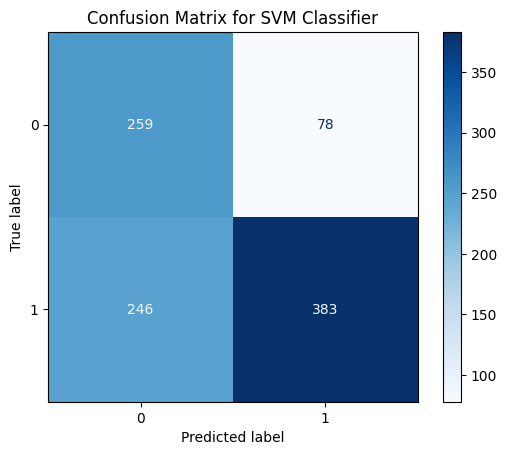

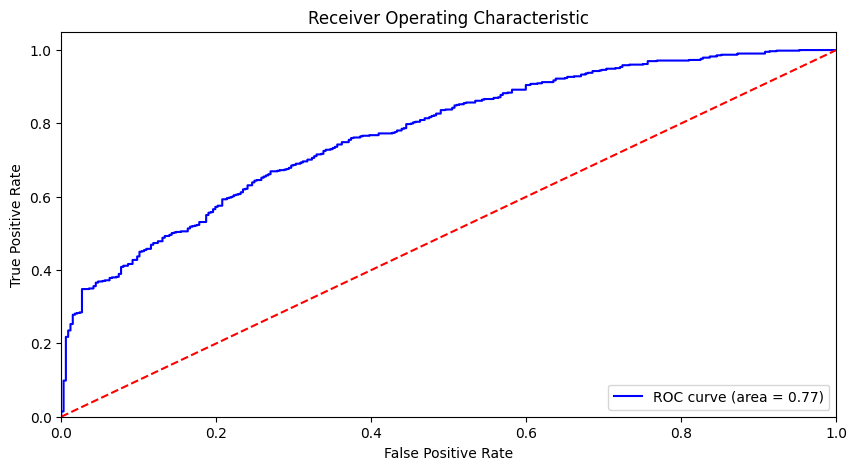

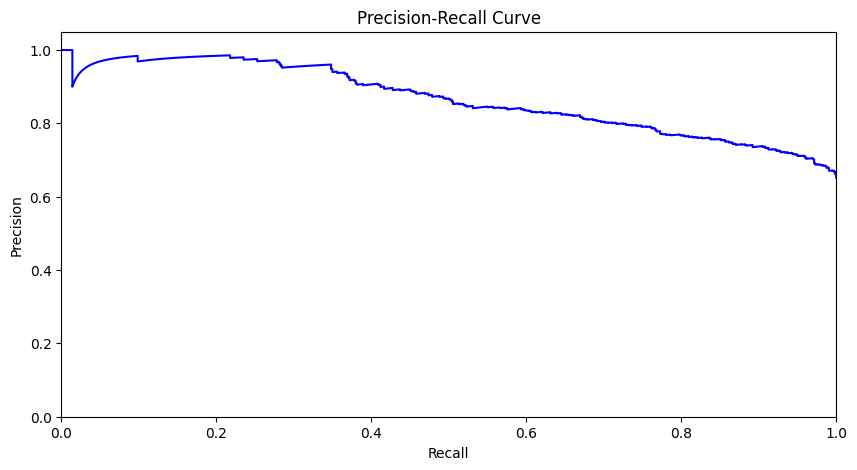

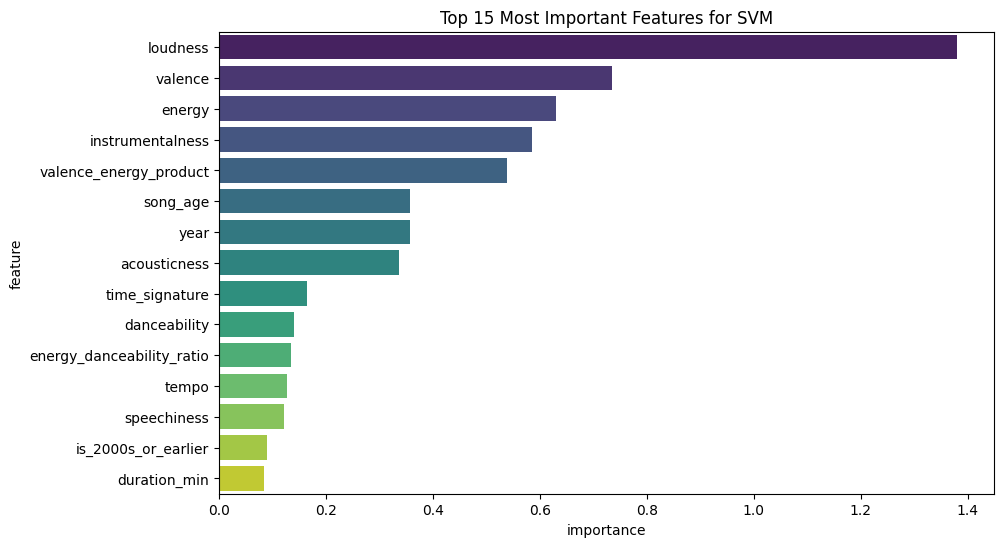

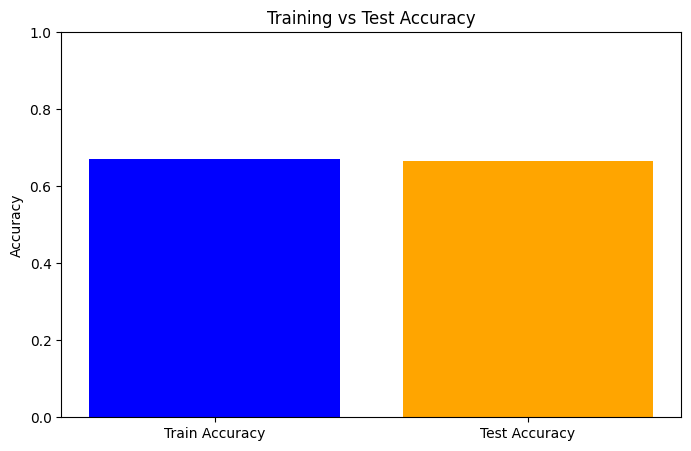

In [33]:
from sklearn.svm import SVC
# Load dataset
combined_df = pd.read_csv('engineered_spotify_data_1.csv')
# Define features and target variable
X = combined_df.drop(columns=['Popularity_Type', 'track_album_release_date', 'release_year', 'track_id','track_album_name','track_popularity','playlist_name','playlist_subgenre','playlist_genre','playlist_id','track_id','track_album_id','id','analysis_url','uri','track_name','track_href','track_artist'])
# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables into dummy/indicator variables
# Encode the target variable (Popularity_Type)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(combined_df['Popularity_Type'])  # Converts 'Low' and 'High' to 0 and 1
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize and train the SVM model
svm_model = SVC(kernel='linear', probability=True, class_weight="balanced", random_state=101)
svm_model.fit(X_train_scaled, y_train)
# Make predictions
y_pred = svm_model.predict(X_test_scaled)
y_train_pred = svm_model.predict(X_train_scaled)
# Calculate evaluation metrics
svm_f1 = f1_score(y_test, y_pred)
svm_acc = accuracy_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_auc = roc_auc_score(y_test, y_pred)
# Print evaluation metrics
print(f'F1 Score: {svm_f1:.4f}')
print(f'Accuracy: {svm_acc:.4f}')
print(f'Recall: {svm_recall:.4f}')
print(f'ROC AUC: {svm_auc:.4f}')
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM Classifier')
plt.show()
# ROC Curve
y_scores = svm_model.decision_function(X_test_scaled)  # Get decision scores for SVM
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
# Plot ROC Curve
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
# Plot Precision-Recall Curve
plt.figure(figsize=(10, 5))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()
# Feature Importance
# For Logistic Regression, feature importance can be derived from the coefficients
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(svm_model.coef_[0])  # Use absolute values of coefficients
}).sort_values('importance', ascending=False)
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15), palette='viridis')
plt.title('Top 15 Most Important Features for SVM')
plt.show()
# Function to visualize training vs validation performance
def train_val(y_train, y_train_pred, y_test, y_pred):
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_pred)
    plt.figure(figsize=(8, 5))
    plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc], color=['blue', 'orange'])
    plt.ylim(0, 1)
    plt.ylabel('Accuracy')
    plt.title('Training vs Test Accuracy')
    plt.show()
# Call the function to visualize training vs validation performance
train_val(y_train, y_train_pred, y_test, y_pred)


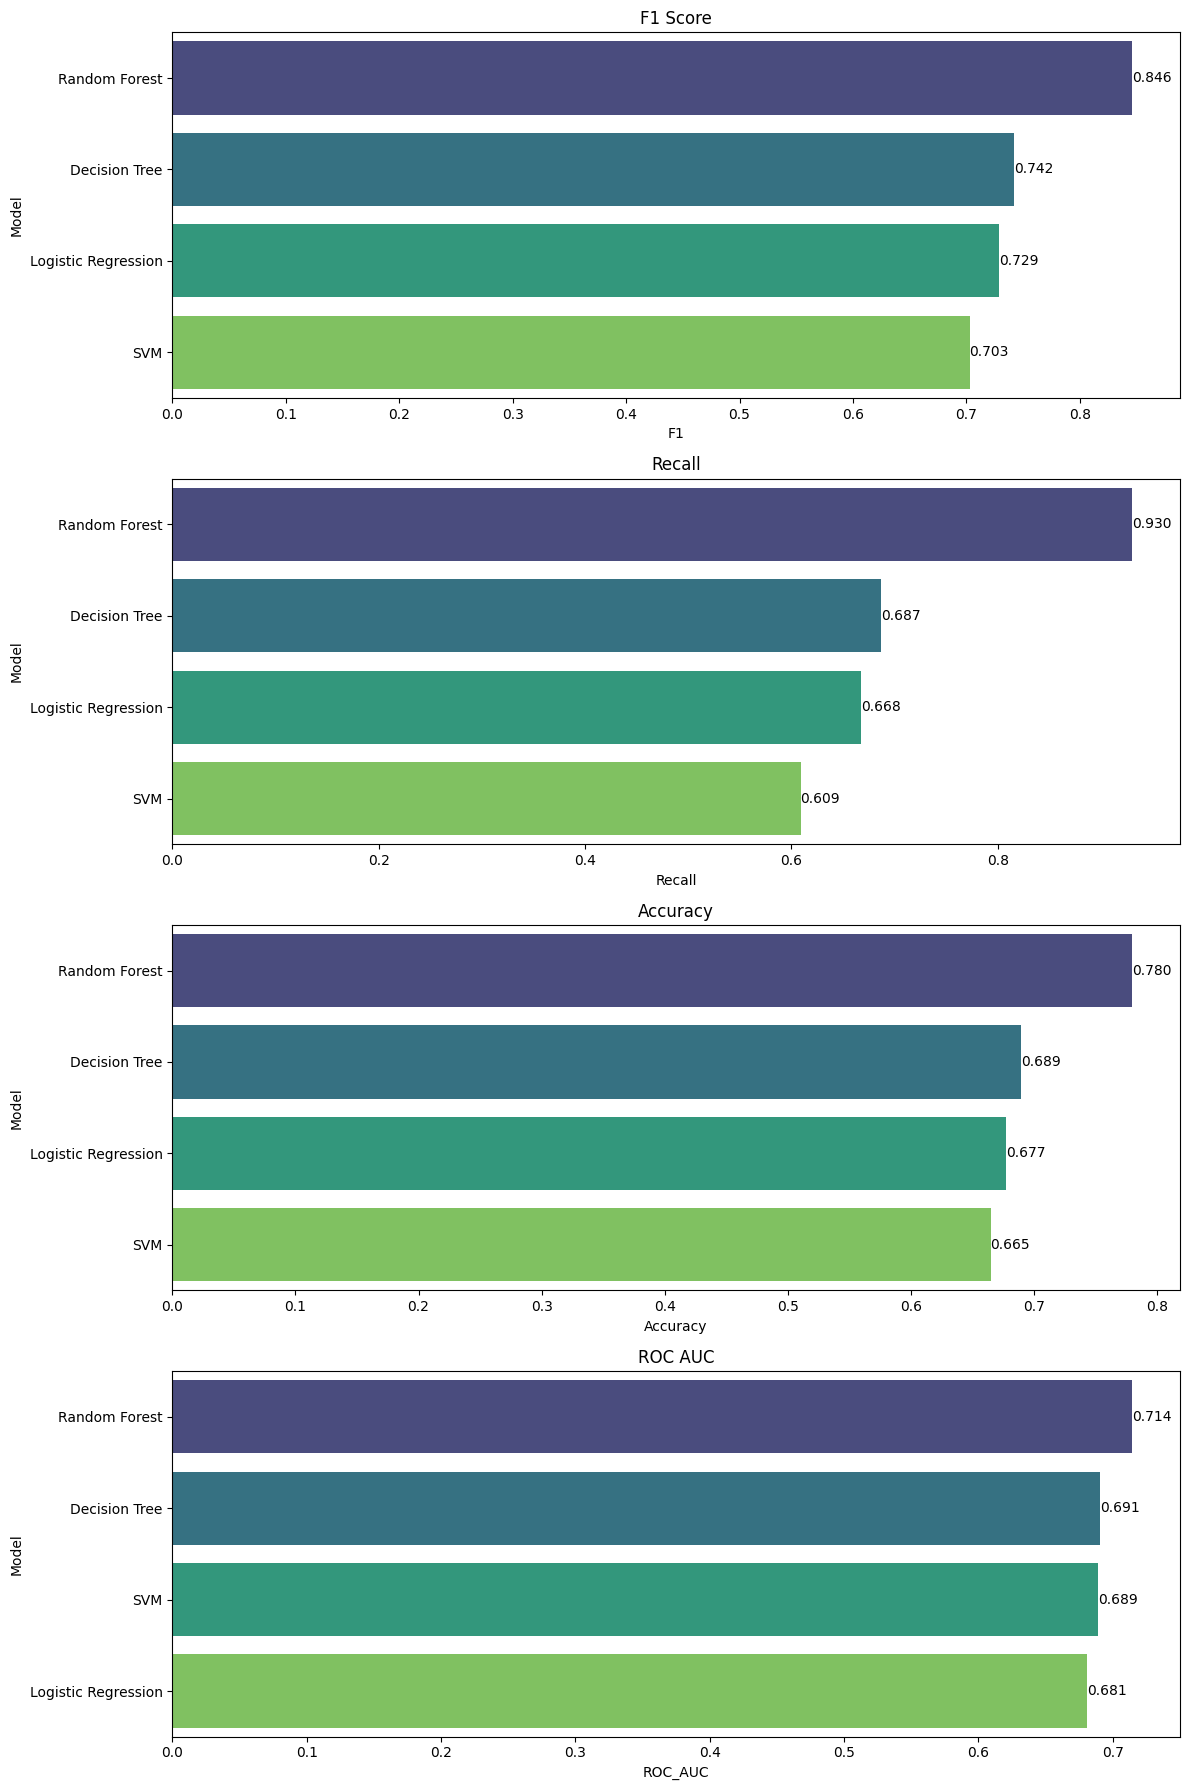

In [34]:
# Create DataFrame with evaluation metrics
compare = pd.DataFrame({
    "Model": ["SVM", "Decision Tree", "Random Forest","Logistic Regression"],
    "F1": [svm_f1, dt_f1, rf_f1,log_reg_f1],
    "Recall": [svm_recall, dt_recall, rf_recall,log_reg_recall],
    "Accuracy": [svm_acc, dt_acc, rf_acc,log_reg_acc],
    "ROC_AUC": [svm_auc, dt_auc, rf_auc,log_reg_auc]
})
# Function to add value labels to the bars
def labels(ax):
    for p in ax.patches:
        width = p.get_width()
        ax.text(width,
                p.get_y() + p.get_height() / 2,
                '{:1.3f}'.format(width),
                ha='left',
                va='center')
plt.figure(figsize=(12, 18))
# Define a color palette
palette = sns.color_palette("viridis", len(compare))
# F1 Score plot
plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette=palette)
labels(ax)
plt.title('F1 Score')
# Recall plot
plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette=palette)
labels(ax)
plt.title('Recall')
# Accuracy plot
plt.subplot(413)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette=palette)
labels(ax)
plt.title('Accuracy')
# ROC_AUC plot
plt.subplot(414)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax = sns.barplot(x="ROC_AUC", y="Model", data=compare, palette=palette)
labels(ax)
plt.title('ROC AUC')
plt.tight_layout()
plt.show()


In [35]:
#As we can see that the tuned random forest gives the most accurate result
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(RF_model, pickle_out)
pickle_out.close()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Load and prepare data
df = pd.read_csv("engineered_spotify_data_1.csv")
feature_cols = [
    'danceability','energy','loudness','speechiness','acousticness',
    'instrumentalness','liveness','valence','tempo','song_age'
]
# Min–max normalize
df[feature_cols] = (df[feature_cols] - df[feature_cols].min()) / (
    df[feature_cols].max() - df[feature_cols].min()
)

# Precompute cosine similarity matrix
cosine_sim = cosine_similarity(df[feature_cols])

def recommend_songs(song_name: str, top_n: int = 5):
    # find all rows matching the song name (case‐insensitive)
    matches = df[df['track_name'].str.lower() == song_name.lower()]
    if matches.empty:
        return None

    # take the first match
    idx = matches.index[0]

    # build list of (other_index, similarity) and exclude idx itself
    sim_scores = [
        (i, score) 
        for i, score in enumerate(cosine_sim[idx]) 
        if i != idx
    ]
    # sort by similarity descending, take top_n
    top_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[:top_n]
    song_indices = [i for i, _ in top_scores]

    # return track_name + artist for those indices
    return df.loc[song_indices, ['track_name', 'track_artist']].reset_index(drop=True)

# ---- USER INPUT & OUTPUT ----
song_input = input("Enter a song name: ").strip()
try:
    top_n = int(input("How many recommendations [default 5]? ") or 5)
except ValueError:
    top_n = 5

recs = recommend_songs(song_input, top_n)
if recs is None:
    print(f"⚠️  '{song_input}' not found in the dataset.")
else:
    print(f"\nTop {top_n} songs similar to '{song_input}':\n")
    for i, row in recs.iterrows():
        print(f"{i+1}. {row['track_name']} — {row['track_artist']}")



Top 5 songs similar to 'Free Fall (feat. J. Cole)':

1. Shape of You — Ed Sheeran
2. Shape of You — Ed Sheeran
3. Sunflower - Spider-Man: Into the Spider-Verse — Post Malone, Swae Lee
4. Kyssa dig nu — estraden
5. Nunca Es Suficiente — Los Ángeles Azules, Natalia Lafourcade
